100%|██████████| 550/550 [00:02<00:00, 232.54it/s]



Class distribution:
Capitate: 800
Hamate: 800
Lunate: 800
Pisiform: 800
Radius: 800
Scaphoid: 800
Trapezium: 800
Trapezoid: 800
Triquetrum: 800
Ulna: 800
finger-1: 800
finger-10: 800
finger-11: 800
finger-12: 800
finger-13: 800
finger-14: 800
finger-15: 800
finger-16: 800
finger-17: 800
finger-18: 800
finger-19: 800
finger-2: 800
finger-3: 800
finger-4: 800
finger-5: 800
finger-6: 800
finger-7: 800
finger-8: 800
finger-9: 800


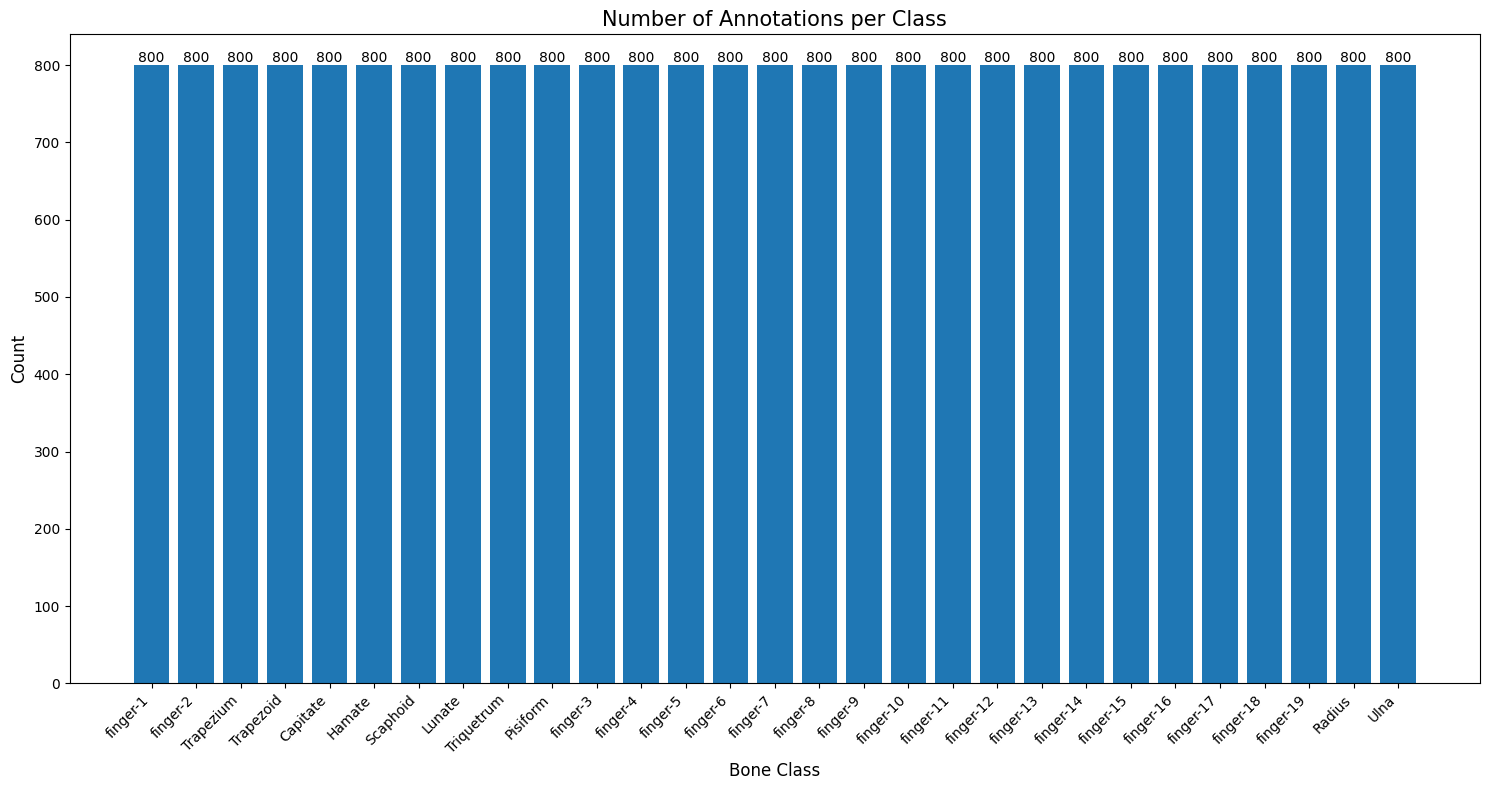

In [1]:
import os
import json
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt

def count_annotations_per_class(base_path):
    class_counts = Counter()
    
    # outputs_json 폴더 경로
    json_base_path = os.path.join(base_path, 'train', 'outputs_json')
    
    # ID001부터 ID550까지 순회
    for id_num in tqdm(range(1, 551)):
        id_folder = f'ID{str(id_num).zfill(3)}'
        json_path = os.path.join(json_base_path, id_folder)
        
        # 해당 ID 폴더가 존재하는 경우에만 처리
        if os.path.exists(json_path):
            # 각 JSON 파일 확인
            for json_file in os.listdir(json_path):
                if json_file.endswith('.json'):
                    with open(os.path.join(json_path, json_file), 'r') as f:
                        data = json.load(f)
                        # 각 annotation의 label 카운트
                        for anno in data['annotations']:
                            class_counts[anno['label']] += 1
    
    return class_counts

def plot_class_distribution(class_counts):
    plt.figure(figsize=(15, 8))
    
    # 클래스 이름과 개수 추출
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    # 막대 그래프 그리기
    bars = plt.bar(classes, counts)
    
    # 그래프 꾸미기
    plt.title('Number of Annotations per Class', fontsize=15)
    plt.xlabel('Bone Class', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # 각 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# 실행
base_path = '../data'  # 상위 폴더의 data 폴더 경로
class_counts = count_annotations_per_class(base_path)

# 결과 출력
print("\nClass distribution:")
for class_name, count in sorted(class_counts.items()):
    print(f"{class_name}: {count}")

# 시각화
plot_class_distribution(class_counts)

Basic Statistics:
               ID         Age      Weight      Height
count  550.000000  550.000000  550.000000  550.000000
mean   275.500000   31.865455   64.516364  167.767455
std    158.915596   10.382489   12.782005    7.956421
min      1.000000   19.000000   42.000000  150.000000
25%    138.250000   25.000000   55.000000  161.000000
50%    275.500000   29.000000   63.000000  168.000000
75%    412.750000   36.000000   74.000000  174.000000
max    550.000000   69.000000  118.000000  187.000000

Missing Values:
ID        0
Age       0
Gender    0
Weight    0
Height    0
dtype: int64


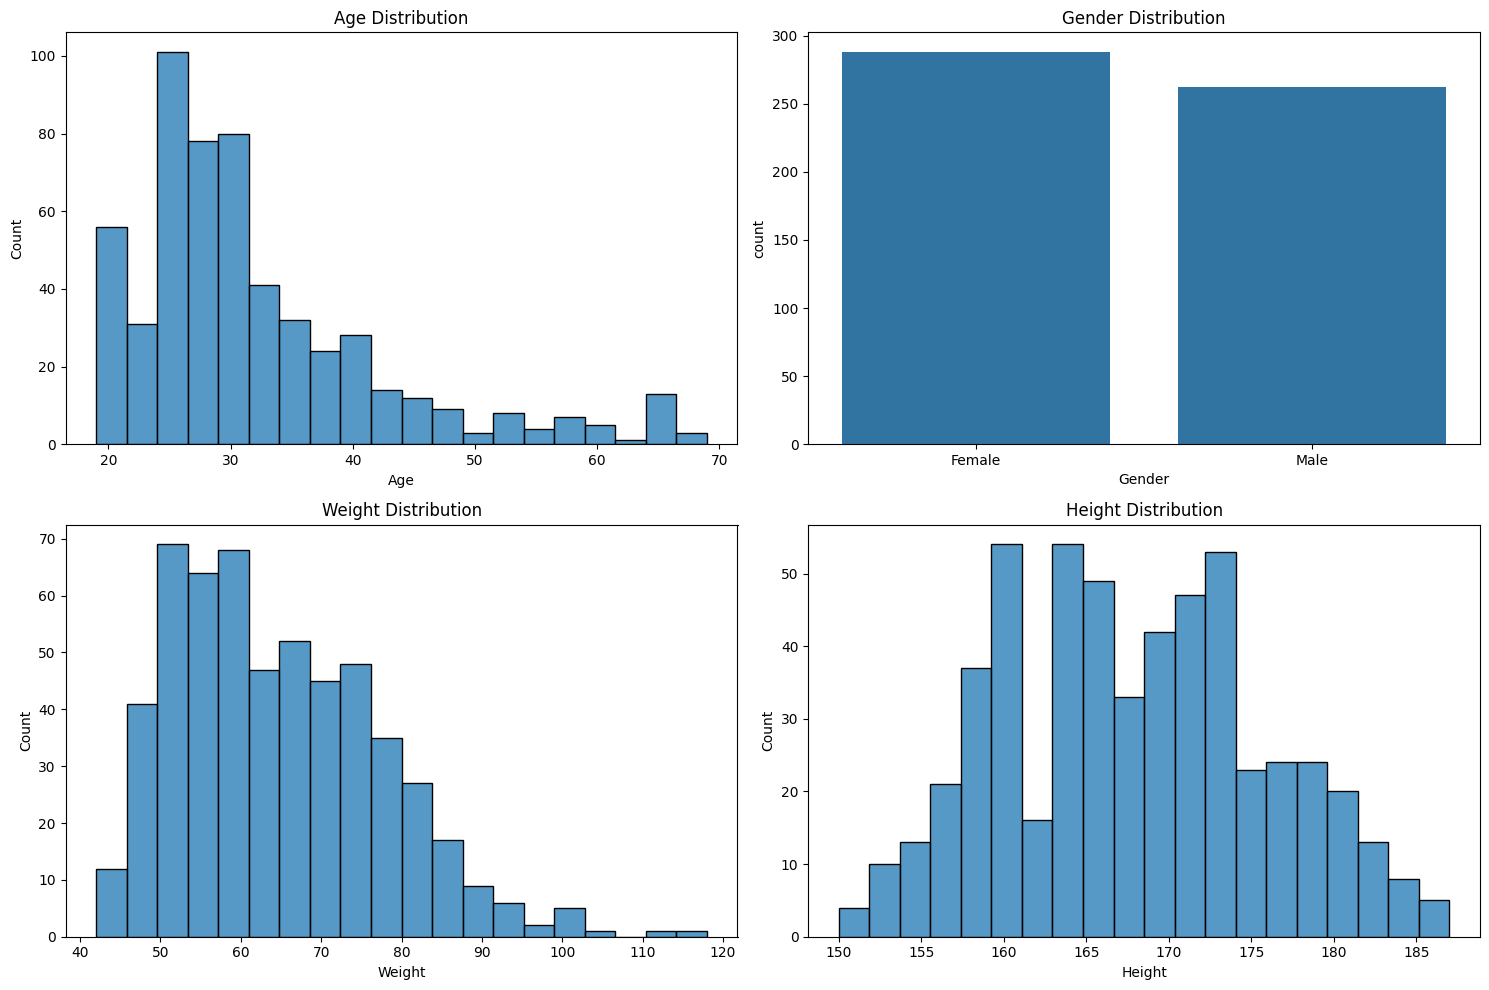

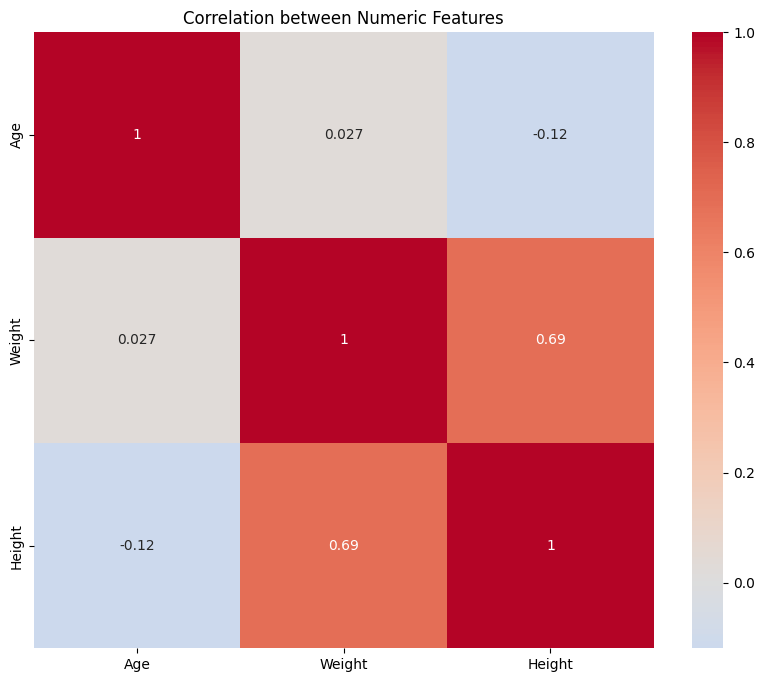

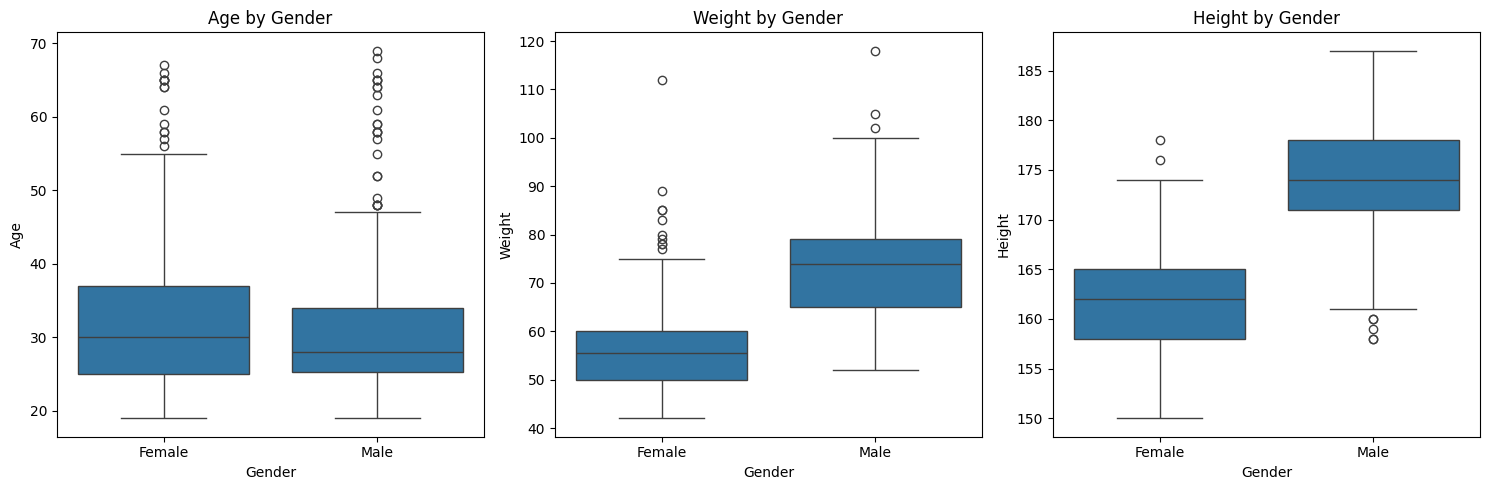


Statistics by Gender:
           ID                                                             \
        count        mean         std  min     25%    50%     75%    max   
Gender                                                                     
Female  288.0  262.732639  166.662425  1.0  107.50  261.0  403.25  548.0   
Male    262.0  289.534351  148.996274  2.0  165.25  296.5  420.75  550.0   

          Age             ... Weight        Height                        \
        count       mean  ...    75%    max  count        mean       std   
Gender                    ...                                              
Female  288.0  32.260417  ...   60.0  112.0  288.0  162.108333  5.085444   
Male    262.0  31.431298  ...   79.0  118.0  262.0  173.988168  5.525924   

                                           
          min    25%    50%    75%    max  
Gender                                     
Female  150.0  158.0  162.0  165.0  178.0  
Male    158.0  171.0  174.0  178.0  187

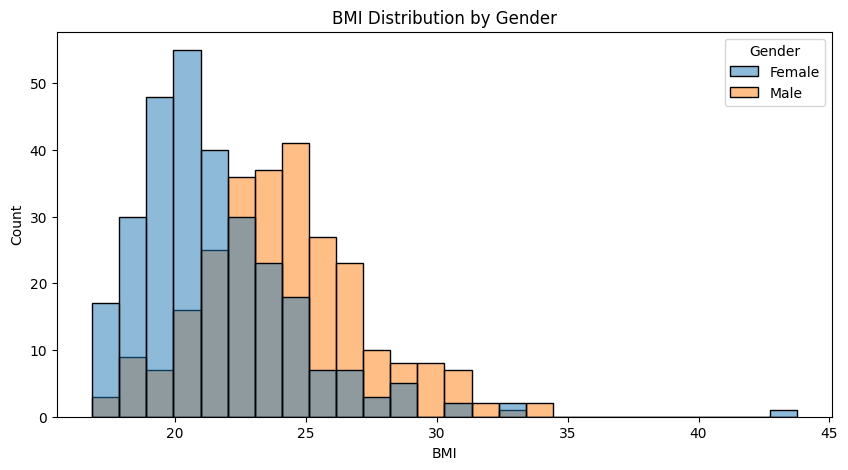


BMI Statistics by Gender:
        count       mean       std        min        25%        50%  \
Gender                                                                
Female  288.0  21.461992  3.073959  16.824227  19.531250  20.816297   
Male    262.0  24.228497  3.088788  17.093495  22.212013  23.985595   

              75%        max  
Gender                        
Female  22.689708  43.750000  
Male    26.053155  34.107989  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False

# Load metadata
meta_df = pd.read_excel('../data/meta_data.xlsx')
meta_df = meta_df.drop('Unnamed: 5', axis=1)  # Remove unnecessary column

# Standardize gender data
def standardize_gender(gender):
    if '여' in str(gender):
        return 'Female'
    elif '남' in str(gender):
        return 'Male'
    return gender

# Rename columns to English
meta_df = meta_df.rename(columns={
    '성별': 'Gender',
    '나이': 'Age',
    '체중(몸무게)': 'Weight',
    '키(신장)': 'Height'
})

meta_df['Gender'] = meta_df['Gender'].apply(standardize_gender)

# Basic statistics
print("Basic Statistics:")
print(meta_df.describe())
print("\nMissing Values:")
print(meta_df.isnull().sum())

# Visualization setup
plt.figure(figsize=(15, 10))

# Update numeric columns list
numeric_cols = ['Age', 'Weight', 'Height']

# Distribution plots
plt.subplot(2, 2, 1)
sns.histplot(data=meta_df, x='Age', bins=20)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.countplot(data=meta_df, x='Gender')
plt.title('Gender Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data=meta_df, x='Weight', bins=20)
plt.title('Weight Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data=meta_df, x='Height', bins=20)
plt.title('Height Distribution')

plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 8))
correlation = meta_df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Numeric Features')
plt.show()

# Gender-based distribution comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=meta_df, x='Gender', y='Age', ax=axes[0])
axes[0].set_title('Age by Gender')

sns.boxplot(data=meta_df, x='Gender', y='Weight', ax=axes[1])
axes[1].set_title('Weight by Gender')

sns.boxplot(data=meta_df, x='Gender', y='Height', ax=axes[2])
axes[2].set_title('Height by Gender')
plt.tight_layout()
plt.show()

# Statistics by gender
print("\nStatistics by Gender:")
print(meta_df.groupby('Gender').describe())

# BMI calculation and analysis
meta_df['BMI'] = meta_df['Weight'] / ((meta_df['Height']/100) ** 2)

plt.figure(figsize=(10, 5))
sns.histplot(data=meta_df, x='BMI', hue='Gender', multiple="layer", alpha=.5)
plt.title('BMI Distribution by Gender')
plt.show()

print("\nBMI Statistics by Gender:")
print(meta_df.groupby('Gender')['BMI'].describe())

100%|██████████| 550/550 [01:07<00:00,  8.13it/s] 
/tmp/ipykernel_589190/3348415657.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([areas for areas in pixel_areas.values()],


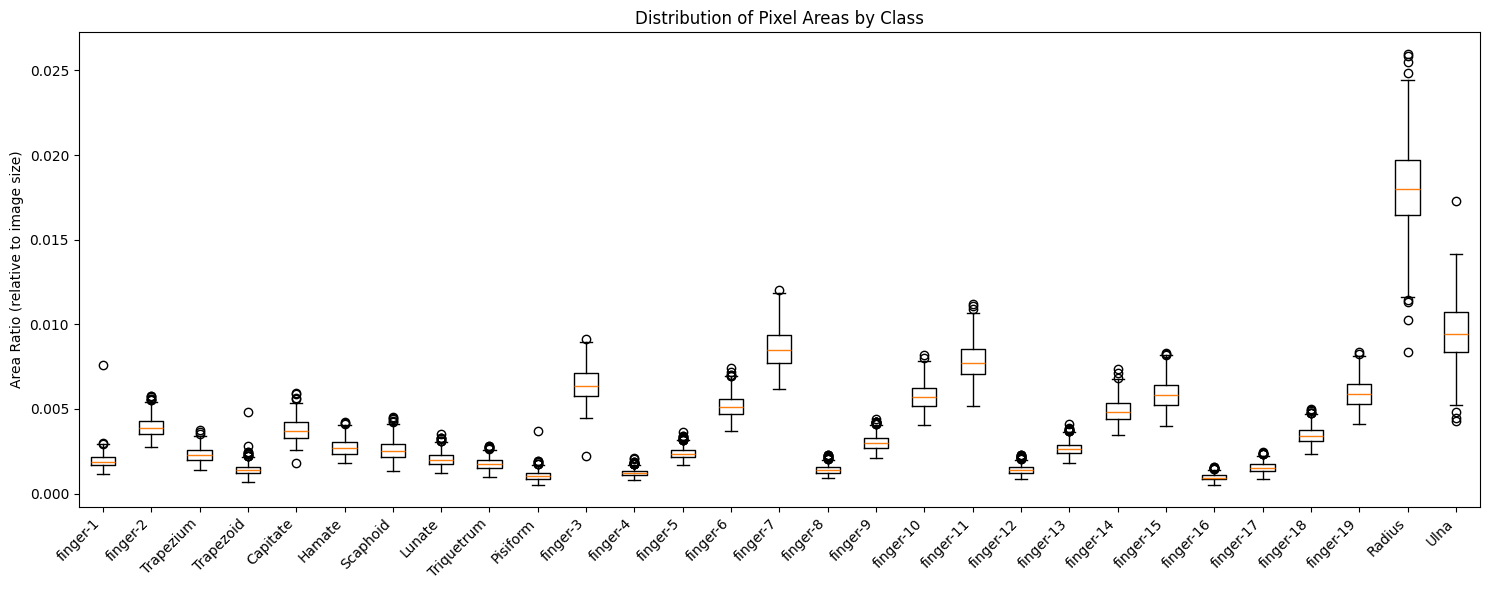

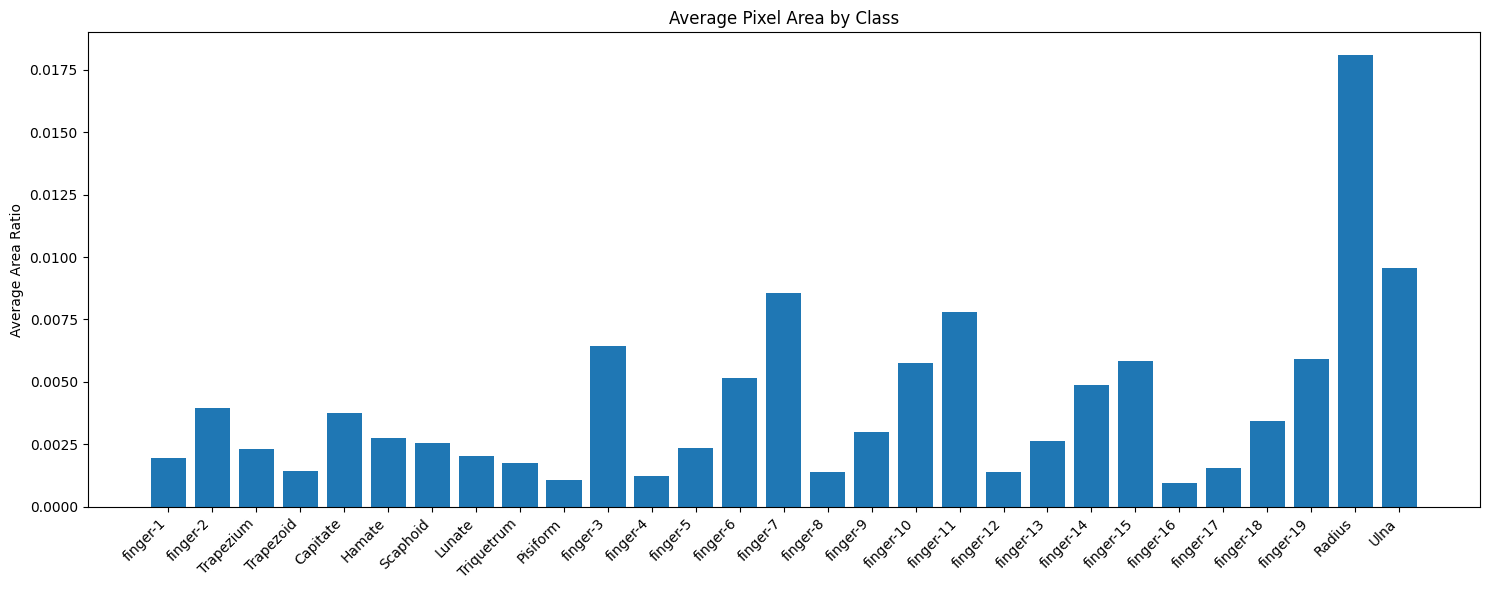


Pixel Area Statistics:

finger-1:
  Mean: 0.001935
  Std: 0.000401
  Min: 0.001164
  Max: 0.007581
  Count: 800

finger-2:
  Mean: 0.003944
  Std: 0.000571
  Min: 0.002765
  Max: 0.005778
  Count: 800

Trapezium:
  Mean: 0.002298
  Std: 0.000400
  Min: 0.001416
  Max: 0.003770
  Count: 800

Trapezoid:
  Mean: 0.001419
  Std: 0.000317
  Min: 0.000653
  Max: 0.004819
  Count: 800

Capitate:
  Mean: 0.003770
  Std: 0.000626
  Min: 0.001811
  Max: 0.005934
  Count: 800

Hamate:
  Mean: 0.002743
  Std: 0.000469
  Min: 0.001809
  Max: 0.004244
  Count: 800

Scaphoid:
  Mean: 0.002561
  Std: 0.000548
  Min: 0.001341
  Max: 0.004527
  Count: 800

Lunate:
  Mean: 0.002030
  Std: 0.000401
  Min: 0.001197
  Max: 0.003524
  Count: 800

Triquetrum:
  Mean: 0.001756
  Std: 0.000311
  Min: 0.000953
  Max: 0.002831
  Count: 800

Pisiform:
  Mean: 0.001058
  Std: 0.000260
  Min: 0.000489
  Max: 0.003670
  Count: 800

finger-3:
  Mean: 0.006448
  Std: 0.000922
  Min: 0.002226
  Max: 0.009158
  Count: 8

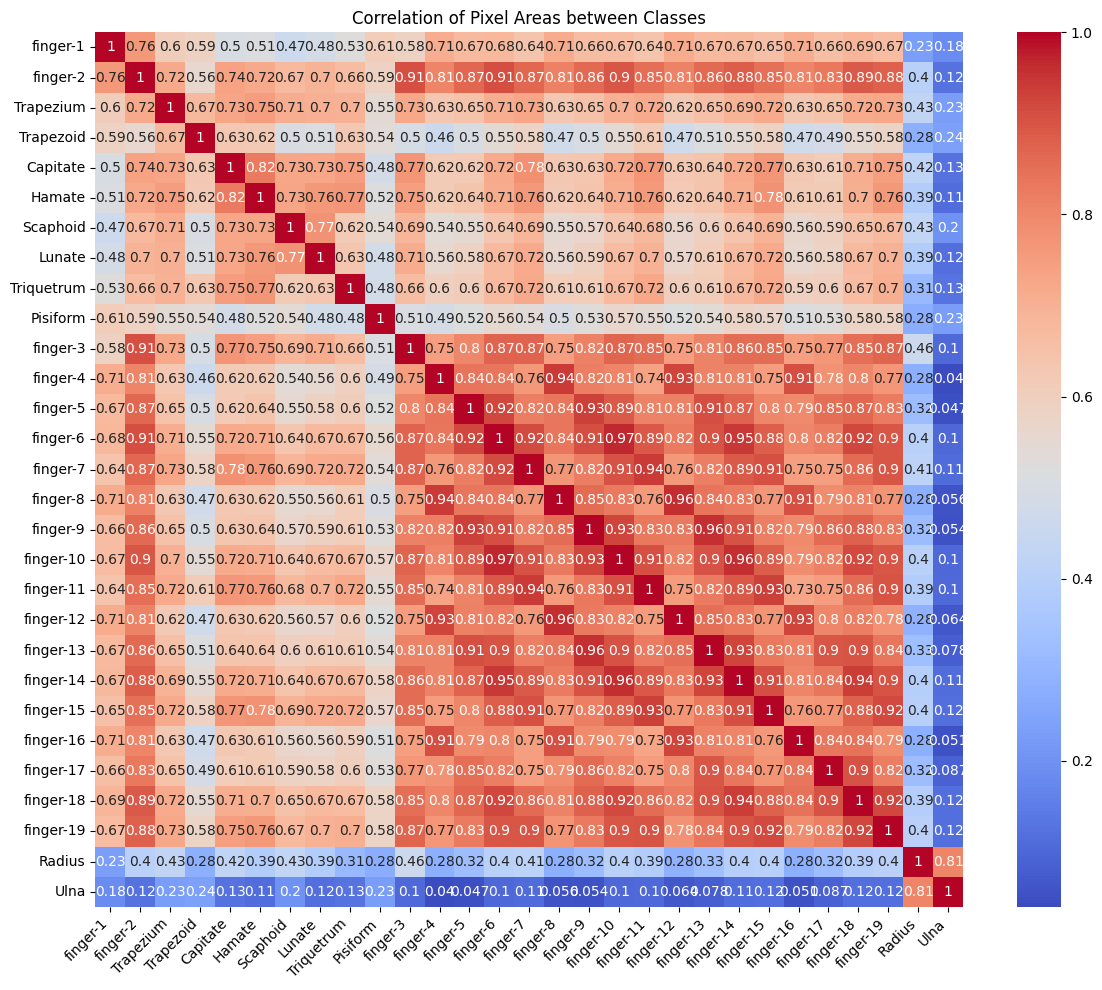

In [5]:
import os
import json
import numpy as np
import cv2
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def analyze_pixel_distribution(base_path):
    json_path = os.path.join(base_path, 'train', 'outputs_json')
    pixel_areas = defaultdict(list)
    img_size = (2048, 2048)
    total_pixels = img_size[0] * img_size[1]
    
    for id_num in tqdm(range(1, 551)):
        id_folder = f'ID{str(id_num).zfill(3)}'
        current_json_path = os.path.join(json_path, id_folder)
        
        if os.path.exists(current_json_path):
            for json_file in os.listdir(current_json_path):
                if json_file.endswith('.json'):
                    with open(os.path.join(current_json_path, json_file), 'r') as f:
                        data = json.load(f)
                        
                        for anno in data['annotations']:
                            points = np.array(anno['points'])
                            
                            # 마스크 기반 면적 계산
                            mask = np.zeros(img_size, dtype=np.uint8)
                            points_int = points.astype(np.int32)
                            cv2.fillPoly(mask, [points_int], 1)
                            area = np.sum(mask)
                            area_ratio = area / total_pixels
                            
                            pixel_areas[anno['label']].append(area_ratio)
    
    return pixel_areas

def calculate_polygon_area(x, y):
    return 0.5 * abs(sum(i * j for i, j in zip(x, y[1:] + y[:1])) - 
                    sum(i * j for i, j in zip(x[1:] + x[:1], y)))

def plot_pixel_distribution(pixel_areas):
    # 1. 박스플롯으로 클래스별 분포 시각화
    plt.figure(figsize=(15, 6))
    plt.boxplot([areas for areas in pixel_areas.values()], 
                labels=pixel_areas.keys(),
                showfliers=True)
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of Pixel Areas by Class')
    plt.ylabel('Area Ratio (relative to image size)')
    plt.tight_layout()
    plt.show()

    # 2. 클래스별 평균 면적
    plt.figure(figsize=(15, 6))
    mean_areas = {k: np.mean(v) for k, v in pixel_areas.items()}
    plt.bar(mean_areas.keys(), mean_areas.values())
    plt.xticks(rotation=45, ha='right')
    plt.title('Average Pixel Area by Class')
    plt.ylabel('Average Area Ratio')
    plt.tight_layout()
    plt.show()

    # 3. 통계 정보 출력
    print("\nPixel Area Statistics:")
    for label, areas in pixel_areas.items():
        print(f"\n{label}:")
        print(f"  Mean: {np.mean(areas):.6f}")
        print(f"  Std: {np.std(areas):.6f}")
        print(f"  Min: {np.min(areas):.6f}")
        print(f"  Max: {np.max(areas):.6f}")
        print(f"  Count: {len(areas)}")

# 실행
base_path = '../data'
pixel_areas = analyze_pixel_distribution(base_path)
plot_pixel_distribution(pixel_areas)

# 4. 클래스간 면적 상관관계
plt.figure(figsize=(12, 10))
correlation_data = []
classes = list(pixel_areas.keys())

for class1 in classes:
    row = []
    for class2 in classes:
        # 두 클래스의 데이터 길이를 맞춤
        min_len = min(len(pixel_areas[class1]), len(pixel_areas[class2]))
        corr = np.corrcoef(pixel_areas[class1][:min_len], 
                          pixel_areas[class2][:min_len])[0, 1]
        row.append(corr)
    correlation_data.append(row)

sns.heatmap(correlation_data, annot=True, cmap='coolwarm', 
            xticklabels=classes, yticklabels=classes)
plt.title('Correlation of Pixel Areas between Classes')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

100%|██████████| 550/550 [01:33<00:00,  5.90it/s] 
/tmp/ipykernel_589190/2694457190.py:86: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(box_data, labels=classes)


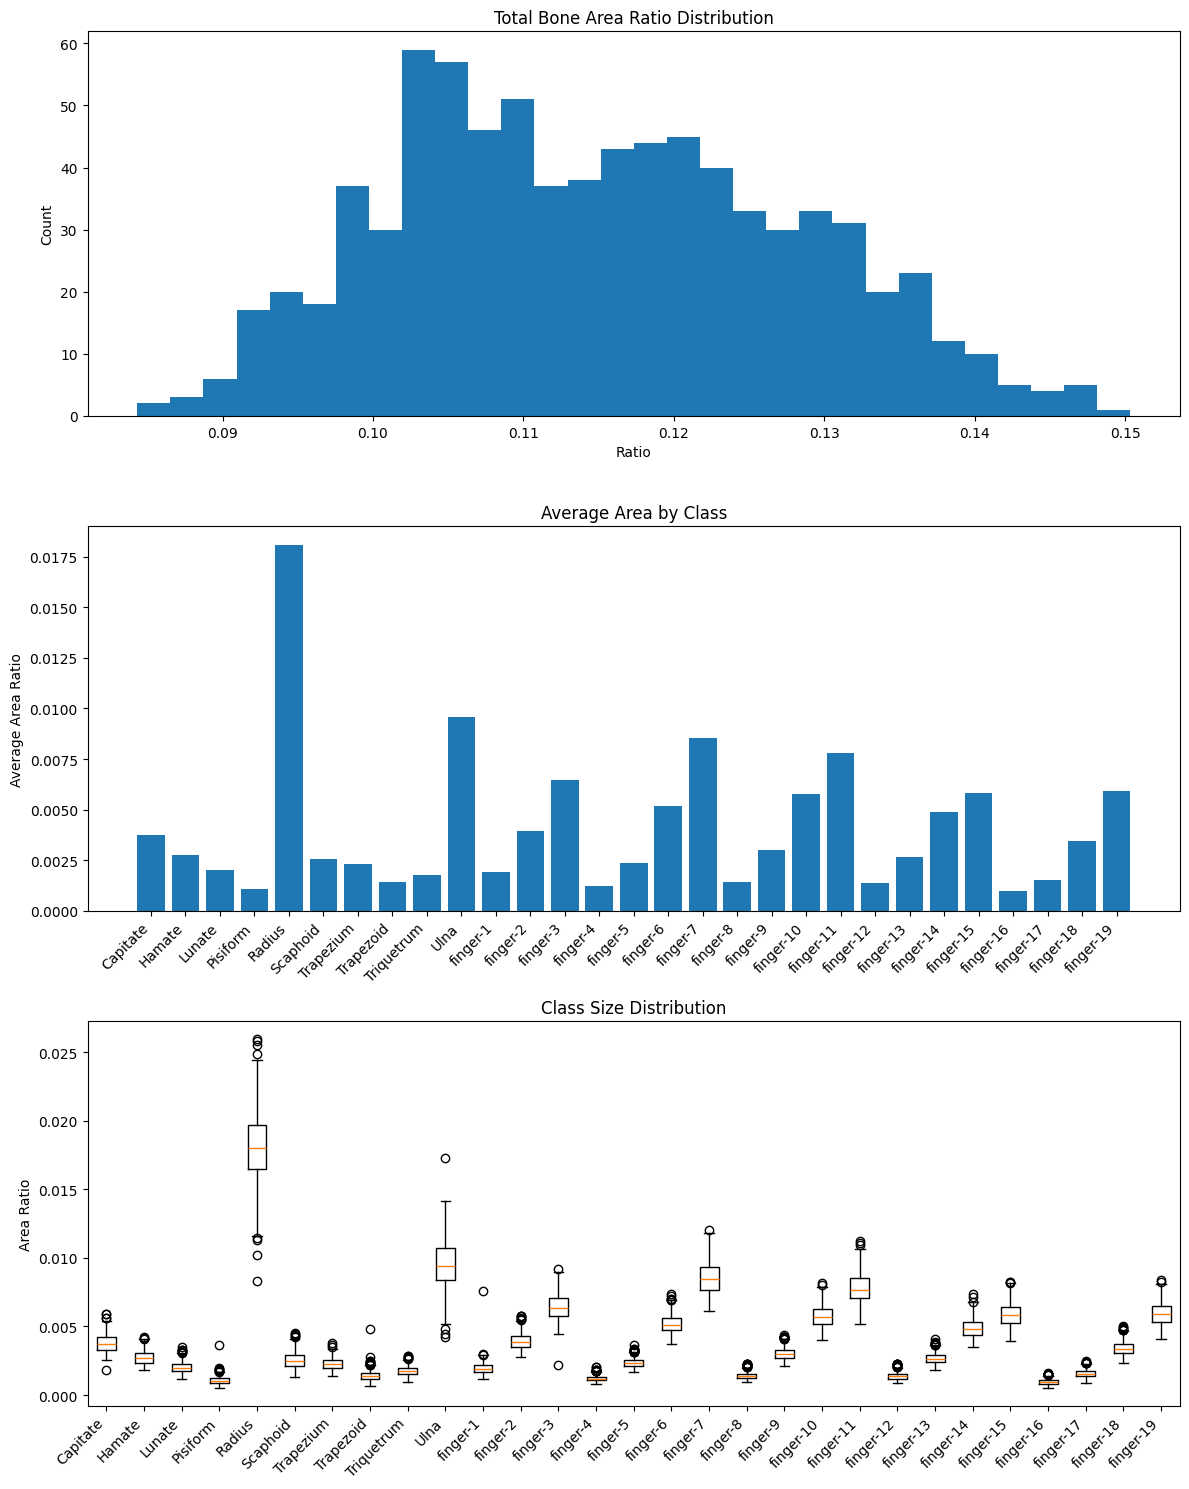

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import cv2
from tqdm import tqdm

def analyze_segmentation_data(base_path):
    json_path = os.path.join(base_path, 'train', 'outputs_json')
    
    known_classes = [
        'Capitate', 'Hamate', 'Lunate', 'Pisiform', 'Radius',
        'Scaphoid', 'Trapezium', 'Trapezoid', 'Triquetrum', 'Ulna'
    ] + [f'finger-{i}' for i in range(1, 20)]
    
    stats = {
        'class_areas': {cls: [] for cls in known_classes},
        'total_bone_ratio': []
    }
    
    for id_num in tqdm(range(1, 551)):
        id_folder = f'ID{str(id_num).zfill(3)}'
        current_json_path = os.path.join(json_path, id_folder)
        
        if os.path.exists(current_json_path):
            for json_file in os.listdir(current_json_path):
                if json_file.endswith('.json'):
                    with open(os.path.join(current_json_path, json_file), 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        img_size = (2048, 2048)
                        
                        # 전체 마스크 생성
                        total_mask = np.zeros(img_size, dtype=np.uint8)
                        
                        # 각 클래스별 면적 계산
                        for anno in data['annotations']:
                            if 'label' in anno and anno['label'] in known_classes:
                                points = np.array(anno['points'])
                                
                                # 개별 마스크 생성
                                mask = np.zeros(img_size, dtype=np.uint8)
                                points_int = points.astype(np.int32)
                                cv2.fillPoly(mask, [points_int], 1)
                                
                                # 개별 클래스 면적 계산
                                class_area = np.sum(mask)
                                area_ratio = class_area / (img_size[0] * img_size[1])
                                stats['class_areas'][anno['label']].append(area_ratio)
                                
                                # 전체 마스크에 추가
                                total_mask = np.logical_or(total_mask, mask)
                        
                        # 전체 면적 계산 (중복 제외)
                        total_area = np.sum(total_mask)
                        total_ratio = total_area / (img_size[0] * img_size[1])
                        stats['total_bone_ratio'].append(total_ratio)
    
    return stats

def calculate_polygon_area(x, y):
    return 0.5 * abs(sum(i * j for i, j in zip(x, y[1:] + y[:1])) - 
                    sum(i * j for i, j in zip(x[1:] + x[:1], y)))

def plot_segmentation_stats(stats):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    
    # 전체 뼈 영역 비율 분포
    ax1.hist(stats['total_bone_ratio'], bins=30)
    ax1.set_title('Total Bone Area Ratio Distribution')
    ax1.set_xlabel('Ratio')
    ax1.set_ylabel('Count')
    
    # 클래스별 평균 영역 비율
    class_means = {k: np.mean(v) if v else 0 for k, v in stats['class_areas'].items()}
    classes = list(class_means.keys())
    means = list(class_means.values())
    
    ax2.bar(range(len(classes)), means)
    ax2.set_xticks(range(len(classes)))
    ax2.set_xticklabels(classes, rotation=45, ha='right')
    ax2.set_title('Average Area by Class')
    ax2.set_ylabel('Average Area Ratio')
    
    # 클래스별 크기 분포 (박스플롯)
    box_data = [v for v in stats['class_areas'].values() if v]
    ax3.boxplot(box_data, labels=classes)
    ax3.set_xticklabels(classes, rotation=45, ha='right')
    ax3.set_title('Class Size Distribution')
    ax3.set_ylabel('Area Ratio')
    
    plt.tight_layout()
    plt.show()

# 실행
base_path = '../data'
stats = analyze_segmentation_data(base_path)
plot_segmentation_stats(stats)

Analyzing current split...
Training IDs: ['ID002', 'ID003', 'ID005', 'ID006', 'ID007', 'ID008', 'ID009', 'ID011', 'ID012', 'ID013', 'ID014', 'ID016', 'ID017', 'ID018', 'ID019', 'ID020', 'ID022', 'ID023', 'ID024', 'ID025', 'ID026', 'ID028', 'ID029', 'ID030', 'ID031', 'ID033', 'ID034', 'ID035', 'ID037', 'ID038', 'ID039', 'ID050', 'ID051', 'ID053', 'ID054', 'ID055', 'ID056', 'ID058', 'ID059', 'ID060', 'ID061', 'ID062', 'ID064', 'ID065', 'ID066', 'ID067', 'ID069', 'ID071', 'ID072', 'ID073', 'ID074', 'ID076', 'ID078', 'ID079', 'ID080', 'ID081', 'ID083', 'ID084', 'ID085', 'ID086', 'ID087', 'ID089', 'ID090', 'ID091', 'ID092', 'ID093', 'ID095', 'ID096', 'ID097', 'ID098', 'ID101', 'ID102', 'ID103', 'ID104', 'ID106', 'ID107', 'ID108', 'ID109', 'ID110', 'ID111', 'ID113', 'ID114', 'ID115', 'ID116', 'ID117', 'ID119', 'ID120', 'ID121', 'ID122', 'ID125', 'ID126', 'ID127', 'ID128', 'ID130', 'ID131', 'ID132', 'ID133', 'ID134', 'ID136', 'ID274', 'ID275', 'ID276', 'ID277', 'ID278', 'ID280', 'ID281', 'ID2

640it [00:55, 11.54it/s]
160it [00:14, 11.40it/s]


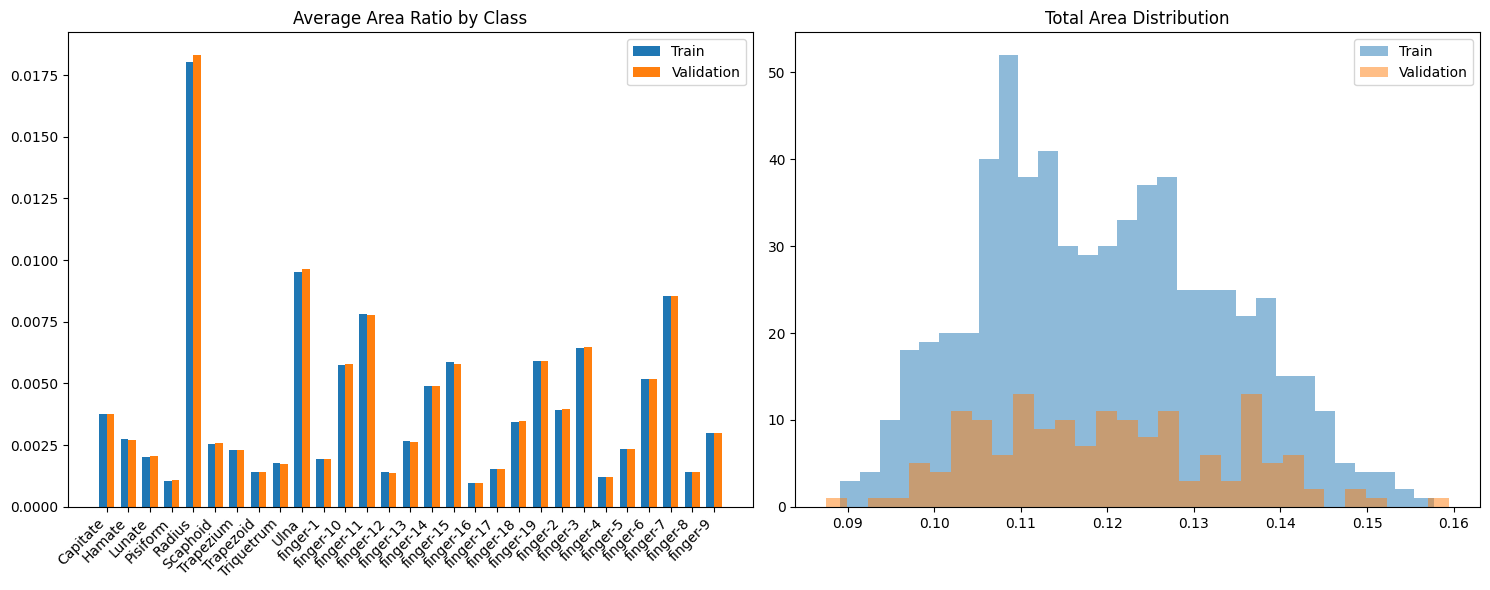


Class-wise statistics:

Capitate:
Train - Mean: 0.0038, Std: 0.0006
Val - Mean: 0.0038, Std: 0.0006

Hamate:
Train - Mean: 0.0027, Std: 0.0005
Val - Mean: 0.0027, Std: 0.0004

Lunate:
Train - Mean: 0.0020, Std: 0.0004
Val - Mean: 0.0021, Std: 0.0004

Pisiform:
Train - Mean: 0.0011, Std: 0.0003
Val - Mean: 0.0011, Std: 0.0002

Radius:
Train - Mean: 0.0180, Std: 0.0025
Val - Mean: 0.0183, Std: 0.0024

Scaphoid:
Train - Mean: 0.0026, Std: 0.0006
Val - Mean: 0.0026, Std: 0.0005

Trapezium:
Train - Mean: 0.0023, Std: 0.0004
Val - Mean: 0.0023, Std: 0.0004

Trapezoid:
Train - Mean: 0.0014, Std: 0.0003
Val - Mean: 0.0014, Std: 0.0003

Triquetrum:
Train - Mean: 0.0018, Std: 0.0003
Val - Mean: 0.0018, Std: 0.0003

Ulna:
Train - Mean: 0.0095, Std: 0.0016
Val - Mean: 0.0097, Std: 0.0017

finger-1:
Train - Mean: 0.0019, Std: 0.0004
Val - Mean: 0.0019, Std: 0.0004

finger-10:
Train - Mean: 0.0058, Std: 0.0008
Val - Mean: 0.0058, Std: 0.0008

finger-11:
Train - Mean: 0.0078, Std: 0.0010
Val - Mean:

800it [01:09, 11.43it/s]



Finding optimal split...

Balanced Split Results:
Training IDs: ['ID001', 'ID002', 'ID004', 'ID005', 'ID006', 'ID007', 'ID010', 'ID011', 'ID012', 'ID013', 'ID015', 'ID016', 'ID017', 'ID018', 'ID019', 'ID021', 'ID022', 'ID023', 'ID024', 'ID025', 'ID027', 'ID028', 'ID029', 'ID030', 'ID032', 'ID033', 'ID034', 'ID036', 'ID037', 'ID038', 'ID039', 'ID052', 'ID053', 'ID054', 'ID055', 'ID057', 'ID058', 'ID059', 'ID060', 'ID061', 'ID063', 'ID064', 'ID065', 'ID066', 'ID067', 'ID070', 'ID071', 'ID072', 'ID073', 'ID075', 'ID077', 'ID078', 'ID079', 'ID080', 'ID082', 'ID083', 'ID084', 'ID085', 'ID086', 'ID088', 'ID089', 'ID090', 'ID091', 'ID092', 'ID094', 'ID095', 'ID096', 'ID097', 'ID099', 'ID100', 'ID101', 'ID102', 'ID103', 'ID105', 'ID106', 'ID107', 'ID108', 'ID109', 'ID110', 'ID112', 'ID113', 'ID114', 'ID115', 'ID116', 'ID118', 'ID119', 'ID120', 'ID121', 'ID123', 'ID124', 'ID125', 'ID126', 'ID127', 'ID129', 'ID130', 'ID131', 'ID132', 'ID133', 'ID135', 'ID136', 'ID274', 'ID275', 'ID277', 'ID279'

640it [00:56, 11.41it/s]
160it [00:14, 11.35it/s]


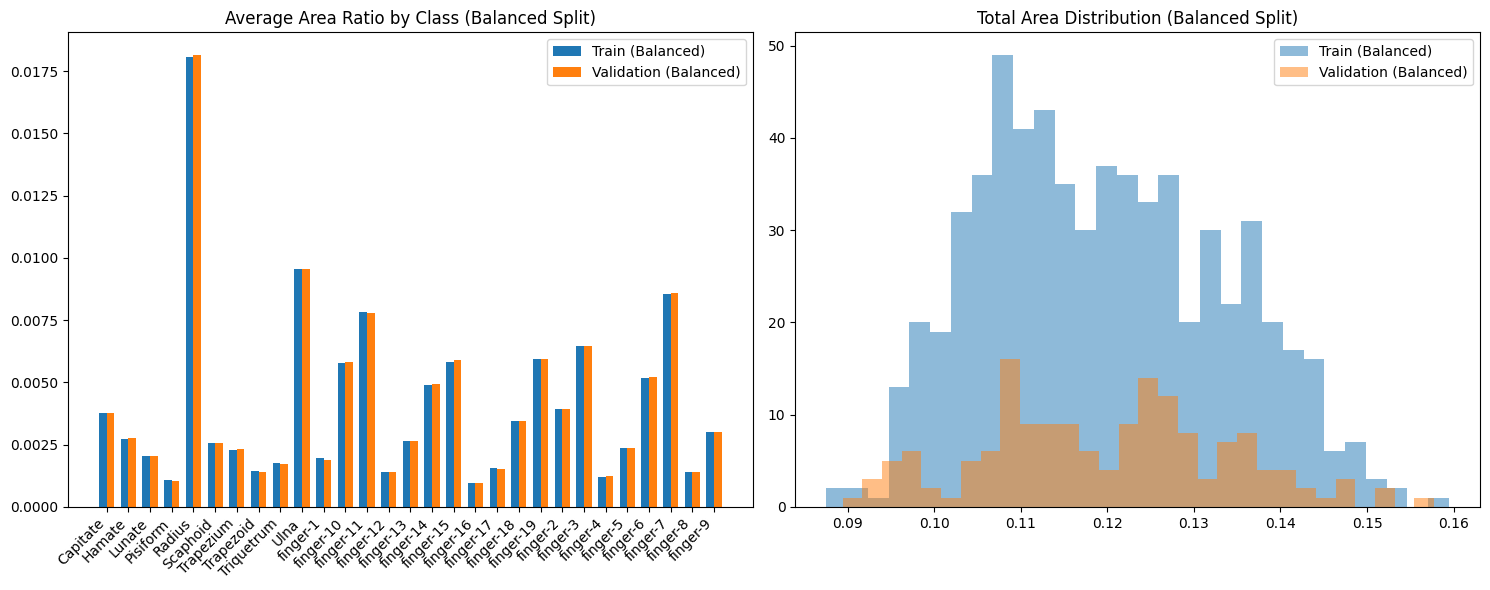


Class-wise statistics (Balanced Split):

Capitate:
Train - Mean: 0.0038, Std: 0.0006
Val - Mean: 0.0038, Std: 0.0006

Hamate:
Train - Mean: 0.0027, Std: 0.0005
Val - Mean: 0.0027, Std: 0.0005

Lunate:
Train - Mean: 0.0020, Std: 0.0004
Val - Mean: 0.0020, Std: 0.0004

Pisiform:
Train - Mean: 0.0011, Std: 0.0003
Val - Mean: 0.0010, Std: 0.0002

Radius:
Train - Mean: 0.0181, Std: 0.0025
Val - Mean: 0.0181, Std: 0.0022

Scaphoid:
Train - Mean: 0.0026, Std: 0.0006
Val - Mean: 0.0026, Std: 0.0005

Trapezium:
Train - Mean: 0.0023, Std: 0.0004
Val - Mean: 0.0023, Std: 0.0004

Trapezoid:
Train - Mean: 0.0014, Std: 0.0003
Val - Mean: 0.0014, Std: 0.0003

Triquetrum:
Train - Mean: 0.0018, Std: 0.0003
Val - Mean: 0.0017, Std: 0.0003

Ulna:
Train - Mean: 0.0096, Std: 0.0017
Val - Mean: 0.0095, Std: 0.0015

finger-1:
Train - Mean: 0.0019, Std: 0.0004
Val - Mean: 0.0019, Std: 0.0003

finger-10:
Train - Mean: 0.0058, Std: 0.0007
Val - Mean: 0.0058, Std: 0.0008

finger-11:
Train - Mean: 0.0078, Std: 0

In [10]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset
from collections import defaultdict
from sklearn.model_selection import GroupKFold
import cv2
from tqdm import tqdm

CLASSES = [
        'finger-1', 'finger-2', 'finger-3', 'finger-4', 'finger-5',
        'finger-6', 'finger-7', 'finger-8', 'finger-9', 'finger-10',
        'finger-11', 'finger-12', 'finger-13', 'finger-14', 'finger-15',
        'finger-16', 'finger-17', 'finger-18', 'finger-19', 'Trapezium',
        'Trapezoid', 'Capitate', 'Hamate', 'Scaphoid', 'Lunate',
        'Triquetrum', 'Pisiform', 'Radius', 'Ulna',
    ]
    
CLASS2IND = {v: i for i, v in enumerate(CLASSES)}
IND2CLASS = {v: k for k, v in CLASS2IND.items()}

class XRayDataset(Dataset):
    def __init__(self, image_root, label_root=None, is_train=True, transforms=None):
        self.is_train = is_train
        self.transforms = transforms
        self.CLASS2IND = CLASS2IND
        self.image_root = image_root
        self.label_root = label_root
        
        # Get PNG and JSON files
        self.pngs = self._get_pngs()
        self.jsons = self._get_jsons() if label_root else None
        
        if label_root:
            # Verify matching between pngs and jsons
            jsons_fn_prefix = {os.path.splitext(fname)[0] for fname in self.jsons}
            pngs_fn_prefix = {os.path.splitext(fname)[0] for fname in self.pngs}
            assert len(jsons_fn_prefix - pngs_fn_prefix) == 0, "Some JSON files don't have matching PNGs"
            assert len(pngs_fn_prefix - jsons_fn_prefix) == 0, "Some PNG files don't have matching JSONs"
        
        # Split dataset
        _filenames = np.array(self.pngs)
        _labelnames = np.array(self.jsons) if self.jsons else None

        # split train-valid
        # 한 폴더 안에 한 인물의 양손에 대한 파일이 존재하기 때문에
        # 폴더 이름을 그룹으로 해서 GroupKFold를 수행
        groups = [os.path.dirname(fname) for fname in _filenames]
        
        # dummy label
        ys = [0 for _ in _filenames]
        
        # 전체 데이터의 20%를 validation data로 사용
        gkf = GroupKFold(n_splits=5)
        
        filenames = []
        labelnames = []
        
        for i, (x, y) in enumerate(gkf.split(_filenames, ys, groups)):
            if is_train:
                # 0번을 validation dataset으로 사용
                if i == 0:
                    continue
                    
                filenames += list(_filenames[y])
                labelnames += list(_labelnames[y]) if _labelnames is not None else []
            else:
                filenames = list(_filenames[y])
                labelnames = list(_labelnames[y]) if _labelnames is not None else []
                break
        
        self.filenames = filenames
        self.labelnames = labelnames

    def _get_pngs(self):
        return sorted([
            os.path.relpath(os.path.join(root, fname), start=self.image_root)
            for root, _dirs, files in os.walk(self.image_root)
            for fname in files
            if os.path.splitext(fname)[1].lower() == ".png"
        ])
        
    def _get_jsons(self):
        return sorted([
            os.path.relpath(os.path.join(root, fname), start=self.label_root)
            for root, _dirs, files in os.walk(self.label_root)
            for fname in files
            if os.path.splitext(fname)[1].lower() == ".json"
        ])

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, item):
        image_name = self.filenames[item]
        image_path = os.path.join(self.image_root, image_name)
        
        image = cv2.imread(image_path)
        image = image / 255.
        
        label_name = self.labelnames[item]
        label_path = os.path.join(self.label_root, label_name)
        
        # (H, W, NC) 모양의 label 생성
        label_shape = tuple(image.shape[:2]) + (len(Config.CLASSES),)
        label = np.zeros(label_shape, dtype=np.uint8)
        
        # label 파일 읽기
        with open(label_path, "r") as f:
            annotations = json.load(f)
        annotations = annotations["annotations"]
        
        # 클래스 별로 처리
        for ann in annotations:
            c = ann["label"]
            class_ind = self.CLASS2IND[c]
            points = np.array(ann["points"])
            
            # polygon 포맷을 dense한 mask 포맷으로 변환
            class_label = np.zeros(image.shape[:2], dtype=np.uint8)
            cv2.fillPoly(class_label, [points], 1)
            label[..., class_ind] = class_label
        
        if self.transforms is not None:
            inputs = {"image": image, "mask": label} if self.is_train else {"image": image}
            result = self.transforms(**inputs)
            image = result["image"]
            label = result["mask"] if self.is_train else label
        
        # channel first 포맷으로 변경
        image = image.transpose(2, 0, 1)
        label = label.transpose(2, 0, 1)
        
        return torch.from_numpy(image).float(), torch.from_numpy(label).float()

def analyze_current_split(dataset_path):
    """현재 GroupKFold로 나눈 데이터셋의 분포 분석"""
    image_root = os.path.join(dataset_path, 'train', 'DCM')
    label_root = os.path.join(dataset_path, 'train', 'outputs_json')
    
    # 현재 데이터셋 split 가져오기
    dataset_train = XRayDataset(image_root, label_root, is_train=True)
    dataset_val = XRayDataset(image_root, label_root, is_train=False)
    
    # ID 추출
    def get_ids(filenames):
        return sorted(set([os.path.dirname(f).split('/')[-1] for f in filenames]))
    
    train_ids = get_ids(dataset_train.filenames)
    val_ids = get_ids(dataset_val.filenames)
    
    print("Training IDs:", train_ids)
    print("Validation IDs:", val_ids)
    print(f"\nNumber of training IDs: {len(train_ids)}")
    print(f"Number of validation IDs: {len(val_ids)}")

    
    print("\nAnalyzing pixel distribution...")
    train_dist = analyze_pixel_distribution(dataset_train.filenames, dataset_train.labelnames, label_root)
    val_dist = analyze_pixel_distribution(dataset_val.filenames, dataset_val.labelnames, label_root)
    
    # 시각화
    plt.figure(figsize=(15, 6))
    
    # 클래스별 평균 면적 비교
    plt.subplot(1, 2, 1)
    classes = sorted(train_dist.keys())
    train_means = [np.mean(train_dist[c]) for c in classes]
    val_means = [np.mean(val_dist[c]) for c in classes]
    
    x = np.arange(len(classes))
    width = 0.35
    
    plt.bar(x - width/2, train_means, width, label='Train')
    plt.bar(x + width/2, val_means, width, label='Validation')
    plt.xticks(x, classes, rotation=45, ha='right')
    plt.title('Average Area Ratio by Class')
    plt.legend()
    
    # 전체 면적 분포 비교
    plt.subplot(1, 2, 2)
    train_total = [sum(areas) for areas in zip(*train_dist.values())]
    val_total = [sum(areas) for areas in zip(*val_dist.values())]
    
    plt.hist(train_total, bins=30, alpha=0.5, label='Train')
    plt.hist(val_total, bins=30, alpha=0.5, label='Validation')
    plt.title('Total Area Distribution')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 통계 출력
    print("\nClass-wise statistics:")
    for cls in classes:
        print(f"\n{cls}:")
        print(f"Train - Mean: {np.mean(train_dist[cls]):.4f}, Std: {np.std(train_dist[cls]):.4f}")
        print(f"Val - Mean: {np.mean(val_dist[cls]):.4f}, Std: {np.std(val_dist[cls]):.4f}")

def analyze_pixel_distribution(filenames, labelnames, label_root):
    """픽셀 분포 분석 함수"""
    class_pixels = defaultdict(list)
    total_pixels = 2048 * 2048
    
    for fname, label_name in tqdm(zip(filenames, labelnames)):
        label_path = os.path.join(label_root, label_name)
        with open(label_path, 'r') as f:
            data = json.load(f)
        
        for ann in data['annotations']:
            points = np.array(ann['points'])
            mask = np.zeros((2048, 2048), dtype=np.uint8)
            cv2.fillPoly(mask, [points.astype(np.int32)], 1)
            area_ratio = np.sum(mask) / total_pixels
            class_pixels[ann['label']].append(area_ratio)
    
    return class_pixels

def analyze_balanced_split(dataset_path):
    """픽셀 분포를 고려한 GroupKFold 분석"""
    image_root = os.path.join(dataset_path, 'train', 'DCM')
    label_root = os.path.join(dataset_path, 'train', 'outputs_json')
    
    # 전체 데이터 준비
    pngs = sorted([
        os.path.relpath(os.path.join(root, fname), start=image_root)
        for root, _dirs, files in os.walk(image_root)
        for fname in files
        if os.path.splitext(fname)[1].lower() == ".png"
    ])
    
    jsons = sorted([
        os.path.relpath(os.path.join(root, fname), start=label_root)
        for root, _dirs, files in os.walk(label_root)
        for fname in files
        if os.path.splitext(fname)[1].lower() == ".json"
    ])
    
    _filenames = np.array(pngs)
    _labelnames = np.array(jsons)
    groups = [os.path.dirname(fname) for fname in _filenames]
    
    # 각 이미지의 클래스별 픽셀 분포 계산
    print("Calculating pixel distributions for all images...")
    pixel_stats = []
    for fname, label_name in tqdm(zip(_filenames, _labelnames)):
        label_path = os.path.join(label_root, label_name)
        with open(label_path, 'r') as f:
            data = json.load(f)
        
        # 각 클래스별 면적 비율 계산
        class_areas = {c: 0.0 for c in CLASSES}
        total_pixels = 2048 * 2048
        
        for ann in data['annotations']:
            points = np.array(ann['points'])
            mask = np.zeros((2048, 2048), dtype=np.uint8)
            cv2.fillPoly(mask, [points.astype(np.int32)], 1)
            area_ratio = np.sum(mask) / total_pixels
            class_areas[ann['label']] = area_ratio
        
        pixel_stats.append(class_areas)
    
    # 최적의 split 찾기
    gkf = GroupKFold(n_splits=5)
    best_split = None
    best_score = float('inf')
    
    print("\nFinding optimal split...")
    for train_idx, val_idx in gkf.split(_filenames, y=np.zeros(len(_filenames)), groups=groups):  # y 파라미터 추가
        # 각 split의 평균 분포 계산
        train_dist = {c: 0.0 for c in CLASSES}
        val_dist = {c: 0.0 for c in CLASSES}
        
        for idx in train_idx:
            for cls, ratio in pixel_stats[idx].items():
                train_dist[cls] += ratio
        for idx in val_idx:
            for cls, ratio in pixel_stats[idx].items():
                val_dist[cls] += ratio
                
        # 평균 계산
        for cls in CLASSES:
            train_dist[cls] /= len(train_idx)
            val_dist[cls] /= len(val_idx)
        
        # 분포 차이 계산
        distribution_diff = sum((train_dist[cls] - val_dist[cls])**2 for cls in CLASSES)
        
        if distribution_diff < best_score:
            best_score = distribution_diff
            best_split = (train_idx, val_idx)
    
    # 최적의 split 결과 분석
    train_idx, val_idx = best_split
    train_files = _filenames[train_idx]
    train_labels = _labelnames[train_idx]
    val_files = _filenames[val_idx]
    val_labels = _labelnames[val_idx]
    
    # ID 출력
    train_ids = sorted(set([os.path.dirname(f).split('/')[-1] for f in train_files]))
    val_ids = sorted(set([os.path.dirname(f).split('/')[-1] for f in val_files]))
    
    print("\nBalanced Split Results:")
    print("Training IDs:", train_ids)
    print("Validation IDs:", val_ids)
    print(f"\nNumber of training IDs: {len(train_ids)}")
    print(f"Number of validation IDs: {len(val_ids)}")
    
    # 분포 시각화
    train_dist = analyze_pixel_distribution(train_files, train_labels, label_root)
    val_dist = analyze_pixel_distribution(val_files, val_labels, label_root)
    
    plt.figure(figsize=(15, 6))
    
    # 클래스별 평균 면적 비교
    plt.subplot(1, 2, 1)
    classes = sorted(train_dist.keys())
    train_means = [np.mean(train_dist[c]) for c in classes]
    val_means = [np.mean(val_dist[c]) for c in classes]
    
    x = np.arange(len(classes))
    width = 0.35
    
    plt.bar(x - width/2, train_means, width, label='Train (Balanced)')
    plt.bar(x + width/2, val_means, width, label='Validation (Balanced)')
    plt.xticks(x, classes, rotation=45, ha='right')
    plt.title('Average Area Ratio by Class (Balanced Split)')
    plt.legend()
    
    # 전체 면적 분포 비교
    plt.subplot(1, 2, 2)
    train_total = [sum(areas) for areas in zip(*train_dist.values())]
    val_total = [sum(areas) for areas in zip(*val_dist.values())]
    
    plt.hist(train_total, bins=30, alpha=0.5, label='Train (Balanced)')
    plt.hist(val_total, bins=30, alpha=0.5, label='Validation (Balanced)')
    plt.title('Total Area Distribution (Balanced Split)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 통계 출력
    print("\nClass-wise statistics (Balanced Split):")
    for cls in classes:
        print(f"\n{cls}:")
        print(f"Train - Mean: {np.mean(train_dist[cls]):.4f}, Std: {np.std(train_dist[cls]):.4f}")
        print(f"Val - Mean: {np.mean(val_dist[cls]):.4f}, Std: {np.std(val_dist[cls]):.4f}")

# 기존 split과 새로운 split 모두 실행하여 비교
print("Analyzing current split...")
analyze_current_split(dataset_path)
print("\n" + "="*50 + "\n")
print("Analyzing balanced split...")
analyze_balanced_split(dataset_path)

100%|██████████| 400/400 [01:09<00:00,  5.76it/s]


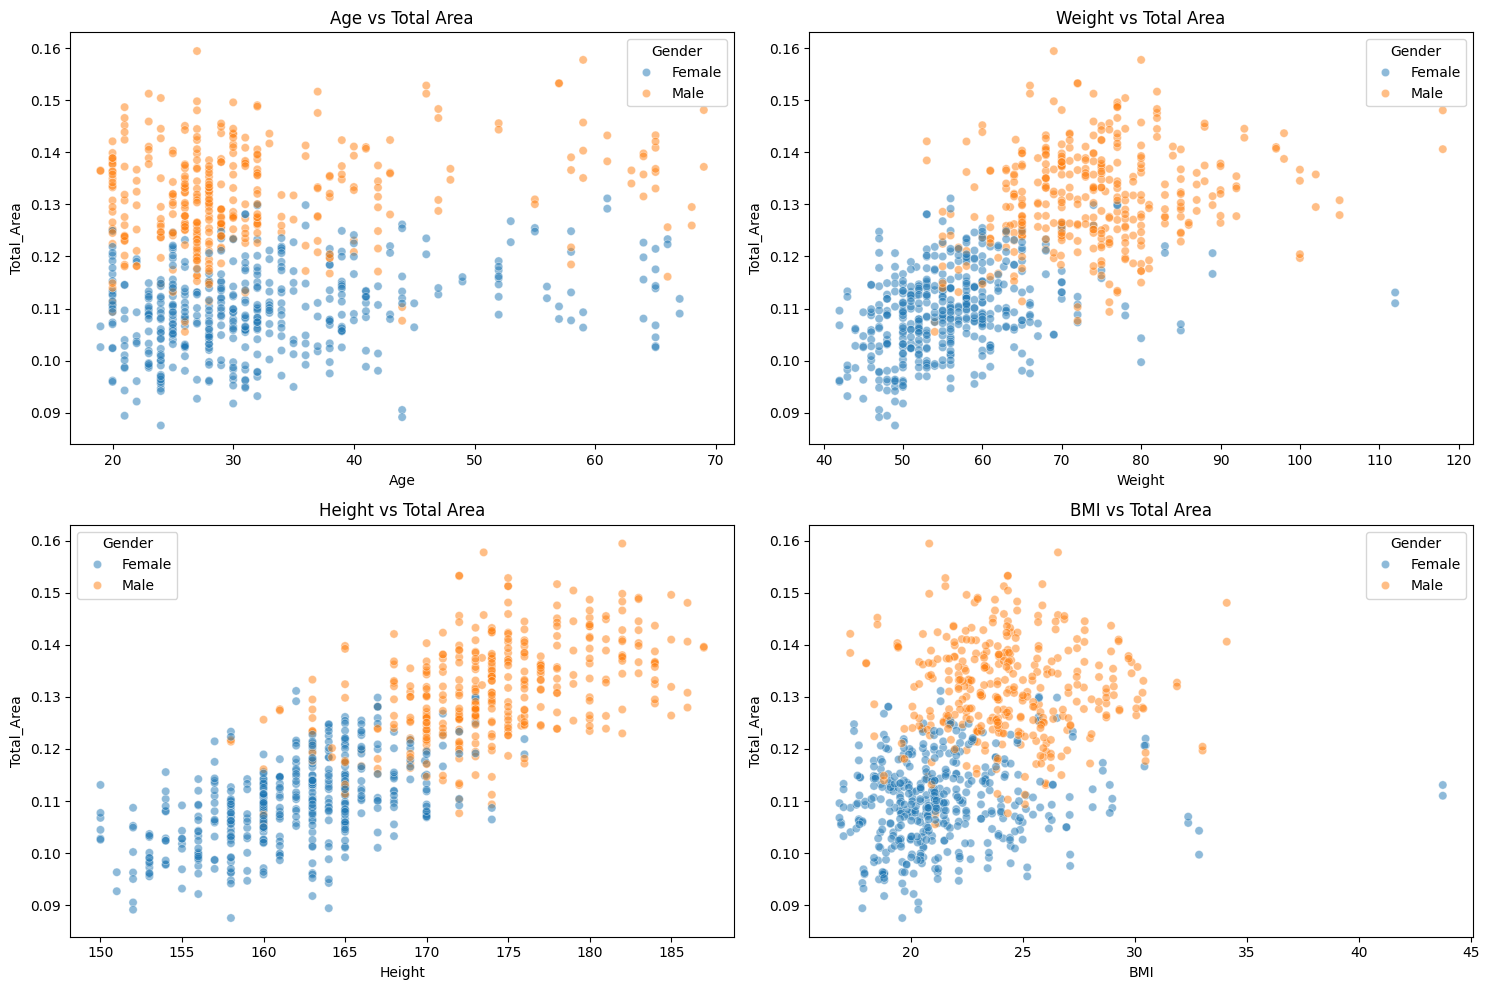

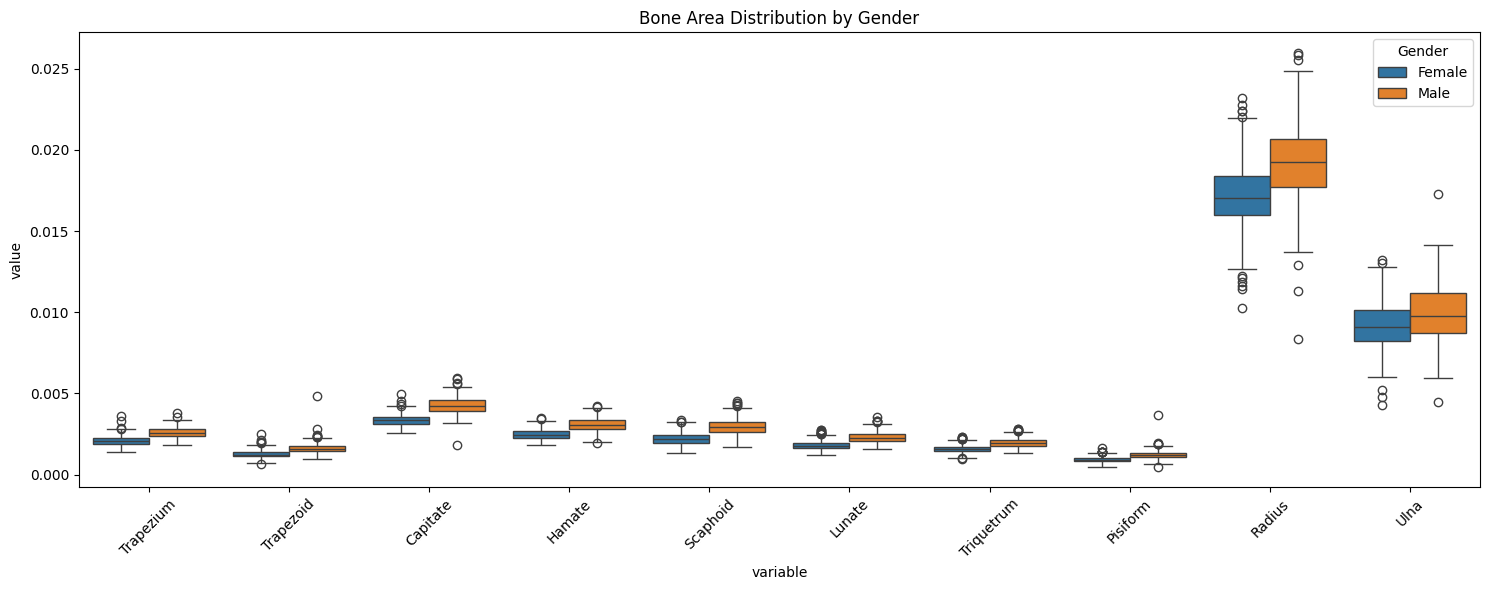

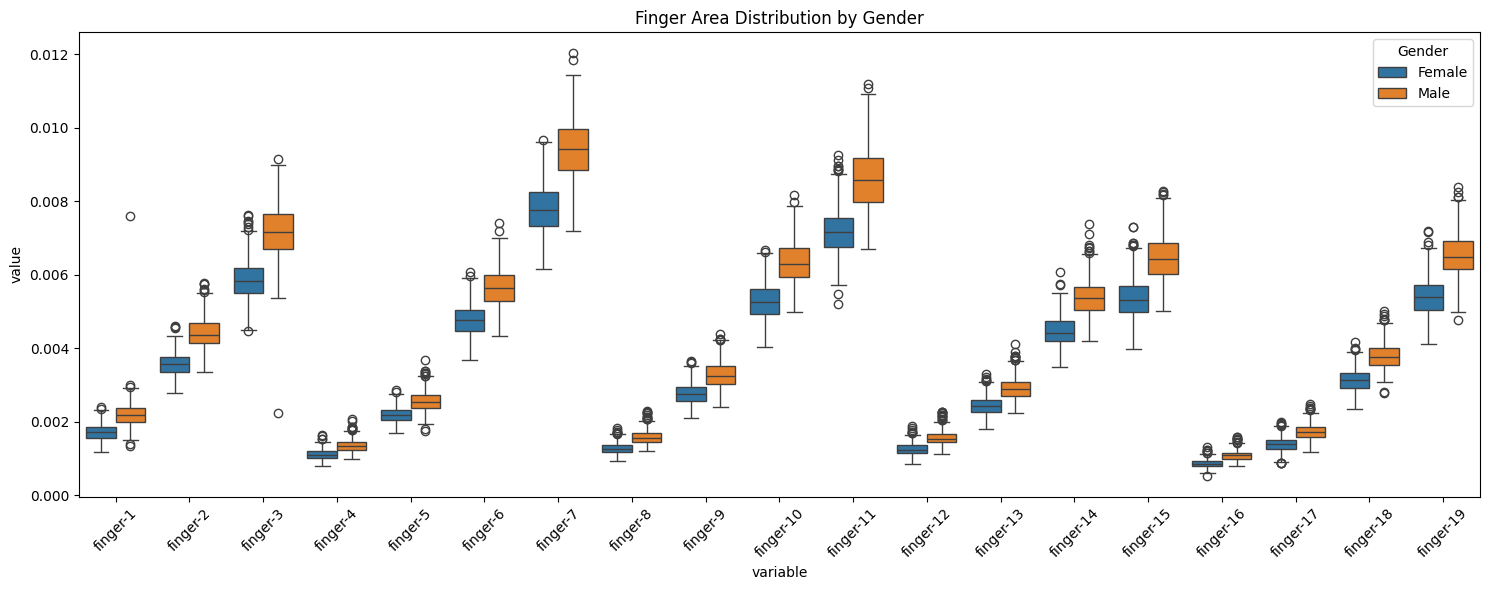

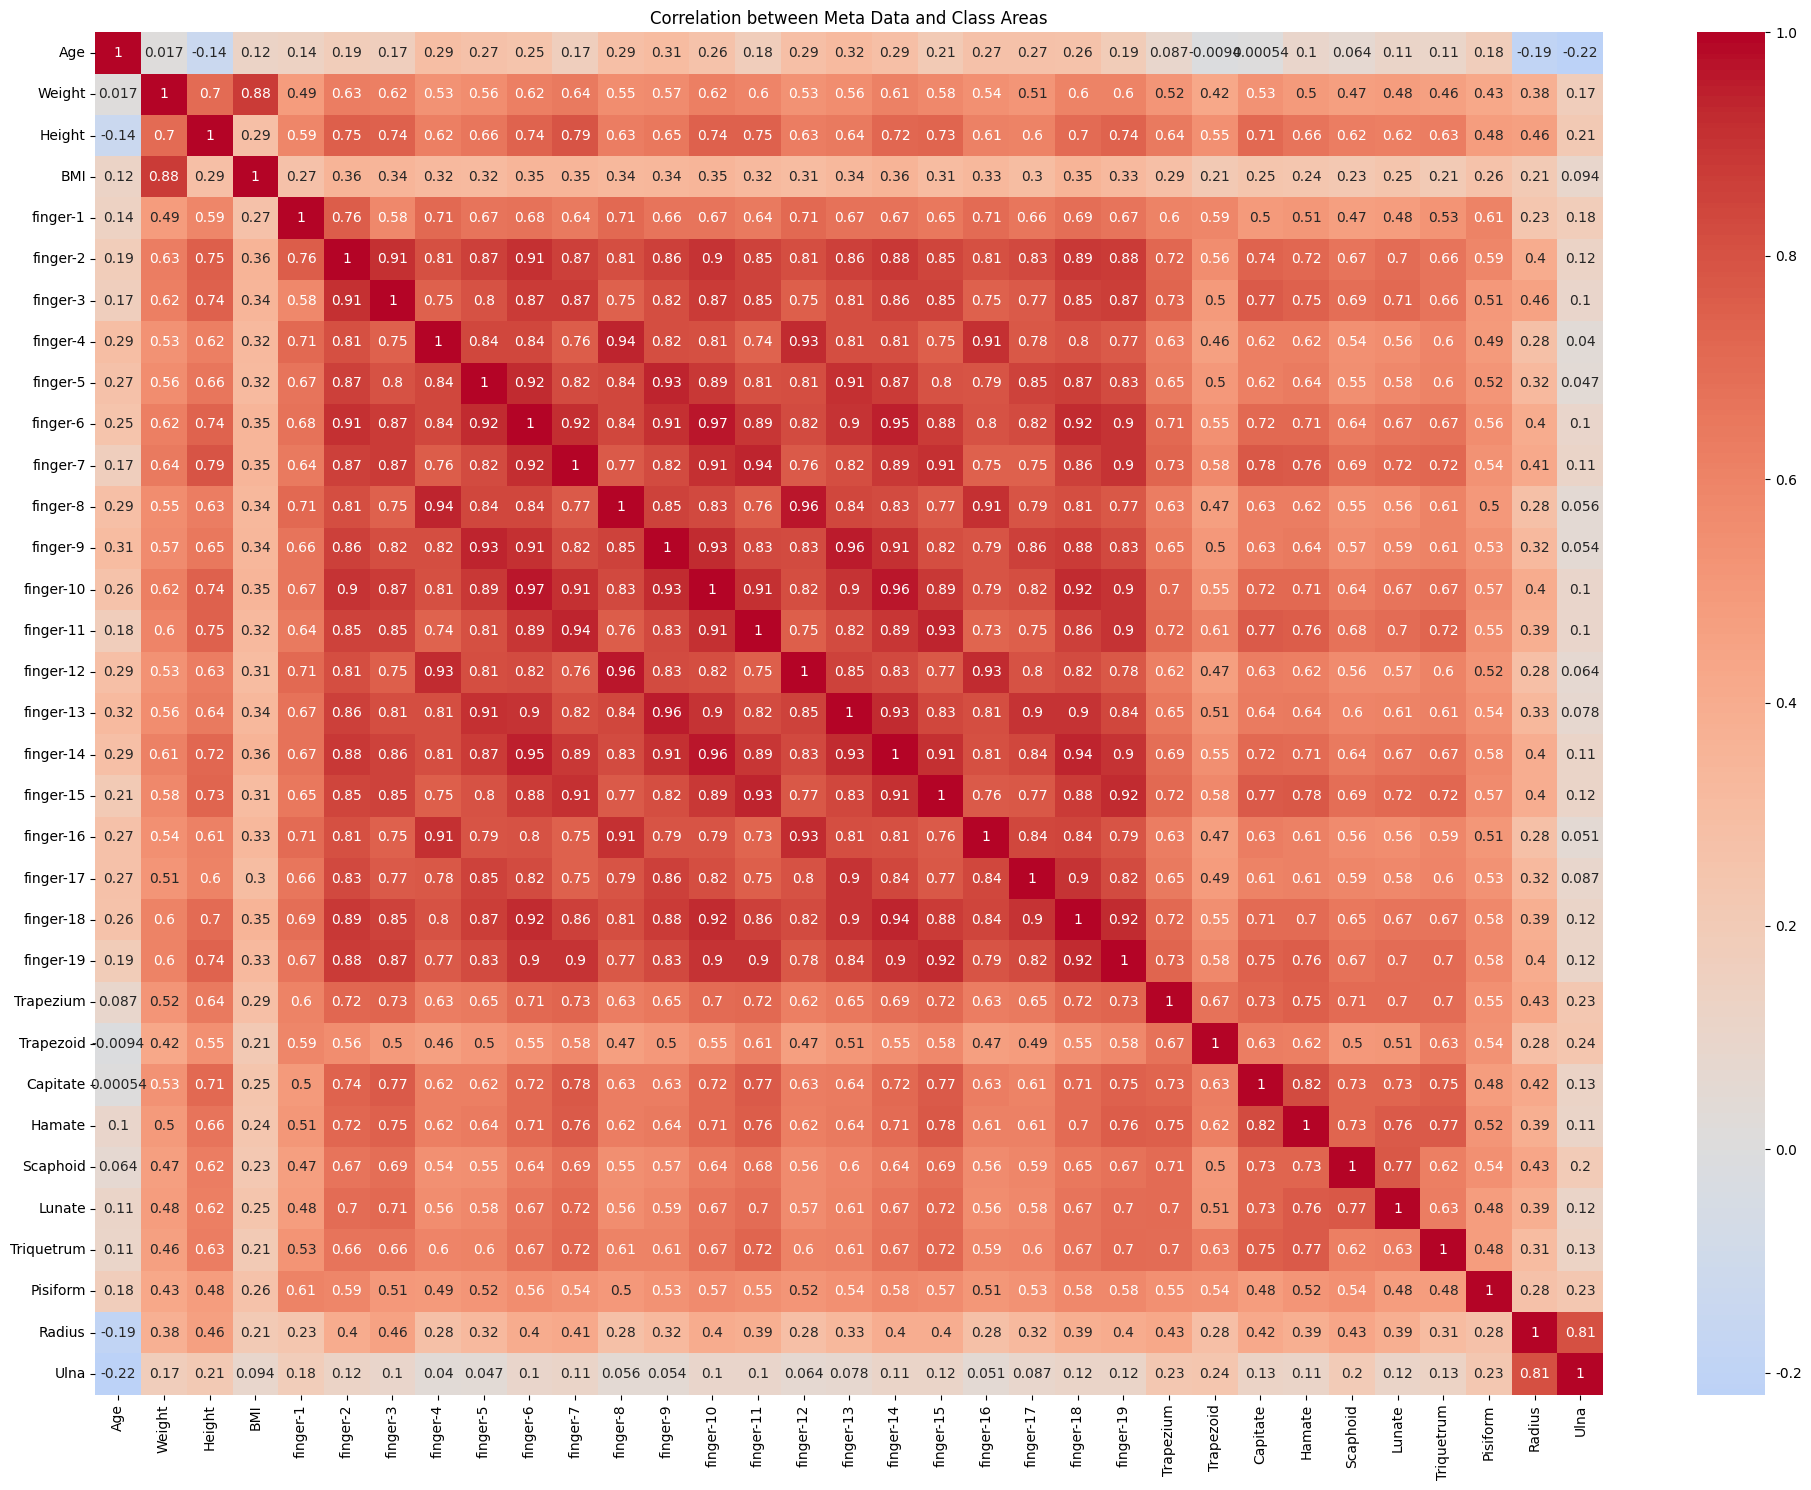


Significant correlations with meta data (|correlation| > 0.3):

Age:
finger-9: 0.309
finger-13: 0.316

Weight:
finger-1: 0.488
finger-2: 0.632
finger-3: 0.618
finger-4: 0.534
finger-5: 0.555
finger-6: 0.617
finger-7: 0.645
finger-8: 0.553
finger-9: 0.565
finger-10: 0.615
finger-11: 0.597
finger-12: 0.532
finger-13: 0.559
finger-14: 0.612
finger-15: 0.581
finger-16: 0.543
finger-17: 0.514
finger-18: 0.602
finger-19: 0.602
Trapezium: 0.519
Trapezoid: 0.424
Capitate: 0.532
Hamate: 0.497
Scaphoid: 0.469
Lunate: 0.484
Triquetrum: 0.463
Pisiform: 0.425
Radius: 0.380

Height:
finger-1: 0.590
finger-2: 0.754
finger-3: 0.745
finger-4: 0.616
finger-5: 0.660
finger-6: 0.742
finger-7: 0.792
finger-8: 0.632
finger-9: 0.649
finger-10: 0.744
finger-11: 0.747
finger-12: 0.627
finger-13: 0.643
finger-14: 0.719
finger-15: 0.733
finger-16: 0.613
finger-17: 0.602
finger-18: 0.705
finger-19: 0.740
Trapezium: 0.639
Trapezoid: 0.547
Capitate: 0.710
Hamate: 0.662
Scaphoid: 0.624
Lunate: 0.622
Triquetrum: 0.6

In [13]:
def analyze_meta_pixel_correlation(dataset_path):
    """메타데이터와 픽셀 분포 간의 상관관계 분석"""
    # 경로 설정
    image_root = os.path.join(dataset_path, 'train', 'DCM')
    label_root = os.path.join(dataset_path, 'train', 'outputs_json')
    
    # 메타데이터 로드 및 전처리
    meta_df = pd.read_excel(os.path.join(dataset_path, 'meta_data.xlsx'))
    meta_df = meta_df.drop('Unnamed: 5', axis=1)  # 불필요한 컬럼 제거
    
    # ID 컬럼 추가 (인덱스를 3자리 문자열로 변환)
    meta_df['ID'] = meta_df.index.map(lambda x: f"ID{str(x+1).zfill(3)}")
    
    # 성별 데이터 표준화
    def standardize_gender(gender):
        if '여' in str(gender):
            return 'Female'
        elif '남' in str(gender):
            return 'Male'
        return gender
    
    # 컬럼명 영문화
    meta_df = meta_df.rename(columns={
        '성별': 'Gender',
        '나이': 'Age',
        '체중(몸무게)': 'Weight',
        '키(신장)': 'Height'
    })
    
    meta_df['Gender'] = meta_df['Gender'].apply(standardize_gender)
    meta_df['BMI'] = meta_df['Weight'] / ((meta_df['Height']/100) ** 2)
    
    # 이미지별 픽셀 분포 계산
    print("Collecting pixel distribution data...")
    image_data = []
    
    for id_folder in tqdm(sorted(os.listdir(image_root))):
        if not id_folder.startswith('ID'):
            continue
            
        # 메타데이터 매칭
        meta_row = meta_df[meta_df['ID'] == id_folder].iloc[0]  # ID 컬럼으로 매칭
        
        # 해당 ID의 모든 이미지에 대한 픽셀 분포 계산
        json_folder = os.path.join(label_root, id_folder)
        if not os.path.exists(json_folder):
            continue
            
        for json_file in os.listdir(json_folder):
            if not json_file.endswith('.json'):
                continue
                
            # 픽셀 분포 계산
            with open(os.path.join(json_folder, json_file), 'r') as f:
                data = json.load(f)
            
            # 클래스별 면적 계산
            class_areas = {c: 0.0 for c in CLASSES}
            total_pixels = 2048 * 2048
            
            for ann in data['annotations']:
                points = np.array(ann['points'])
                mask = np.zeros((2048, 2048), dtype=np.uint8)
                cv2.fillPoly(mask, [points.astype(np.int32)], 1)
                area_ratio = np.sum(mask) / total_pixels
                class_areas[ann['label']] = area_ratio
            
            # 전체 면적 계산
            total_area = sum(class_areas.values())
            
            # 데이터 저장
            row_data = {
                'ID': id_folder,
                'Age': meta_row['Age'],
                'Gender': meta_row['Gender'],
                'Height': meta_row['Height'],
                'Weight': meta_row['Weight'],
                'BMI': meta_row['BMI'],
                'Total_Area': total_area,
                **class_areas
            }
            image_data.append(row_data)
    
    # DataFrame 생성
    df = pd.DataFrame(image_data)
    
    # 시각화
    plt.figure(figsize=(15, 10))
    
    # 1. 메타데이터 수치형 변수와 전체 면적의 관계
    numeric_cols = ['Age', 'Weight', 'Height', 'BMI']
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=col, y='Total_Area', hue='Gender', alpha=0.5)
        plt.title(f'{col} vs Total Area')
    
    plt.tight_layout()
    plt.show()
    
    # 2. 성별에 따른 클래스별 면적 분포
    bone_classes = [c for c in CLASSES if not c.startswith('finger')]
    finger_classes = [c for c in CLASSES if c.startswith('finger')]
    
    # 2.1 뼈 클래스
    plt.figure(figsize=(15, 6))
    melted_bone = pd.melt(df, id_vars=['Gender'], value_vars=bone_classes)
    sns.boxplot(data=melted_bone, x='variable', y='value', hue='Gender')
    plt.xticks(rotation=45)
    plt.title('Bone Area Distribution by Gender')
    plt.tight_layout()
    plt.show()
    
    # 2.2 손가락 클래스
    plt.figure(figsize=(15, 6))
    melted_finger = pd.melt(df, id_vars=['Gender'], value_vars=finger_classes)
    sns.boxplot(data=melted_finger, x='variable', y='value', hue='Gender')
    plt.xticks(rotation=45)
    plt.title('Finger Area Distribution by Gender')
    plt.tight_layout()
    plt.show()
    
    # 3. 상관관계 히트맵
    corr_cols = numeric_cols + list(class_areas.keys())
    corr_matrix = df[corr_cols].corr()
    
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation between Meta Data and Class Areas')
    plt.tight_layout()
    plt.show()
    
    # 4. 주요 상관관계 출력
    print("\nSignificant correlations with meta data (|correlation| > 0.3):")
    meta_class_corr = corr_matrix.loc[numeric_cols, class_areas.keys()]
    
    for meta_col in numeric_cols:
        significant_corr = meta_class_corr.loc[meta_col][abs(meta_class_corr.loc[meta_col]) > 0.3]
        if len(significant_corr) > 0:
            print(f"\n{meta_col}:")
            for cls, corr in significant_corr.items():
                print(f"{cls}: {corr:.3f}")
    
    return df

# 실행
correlation_df = analyze_meta_pixel_correlation('../data')


Stratified Split Statistics:

Training set distribution:
Female_Q1    0.250000
Female_Q2    0.243750
Male_Q3      0.212500
Male_Q4      0.196875
Female_Q3    0.043750
Male_Q2      0.043750
Male_Q1      0.006250
Female_Q4    0.003125
Name: proportion, dtype: float64

Validation set distribution:
Female_Q1    0.2625
Female_Q2    0.2375
Male_Q4      0.1875
Male_Q3      0.1625
Female_Q3    0.0625
Male_Q2      0.0625
Male_Q1      0.0250
Name: proportion, dtype: float64

Number of training IDs: 320
Number of validation IDs: 80


/tmp/ipykernel_589190/3302205394.py:135: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(box_data, labels=labels)


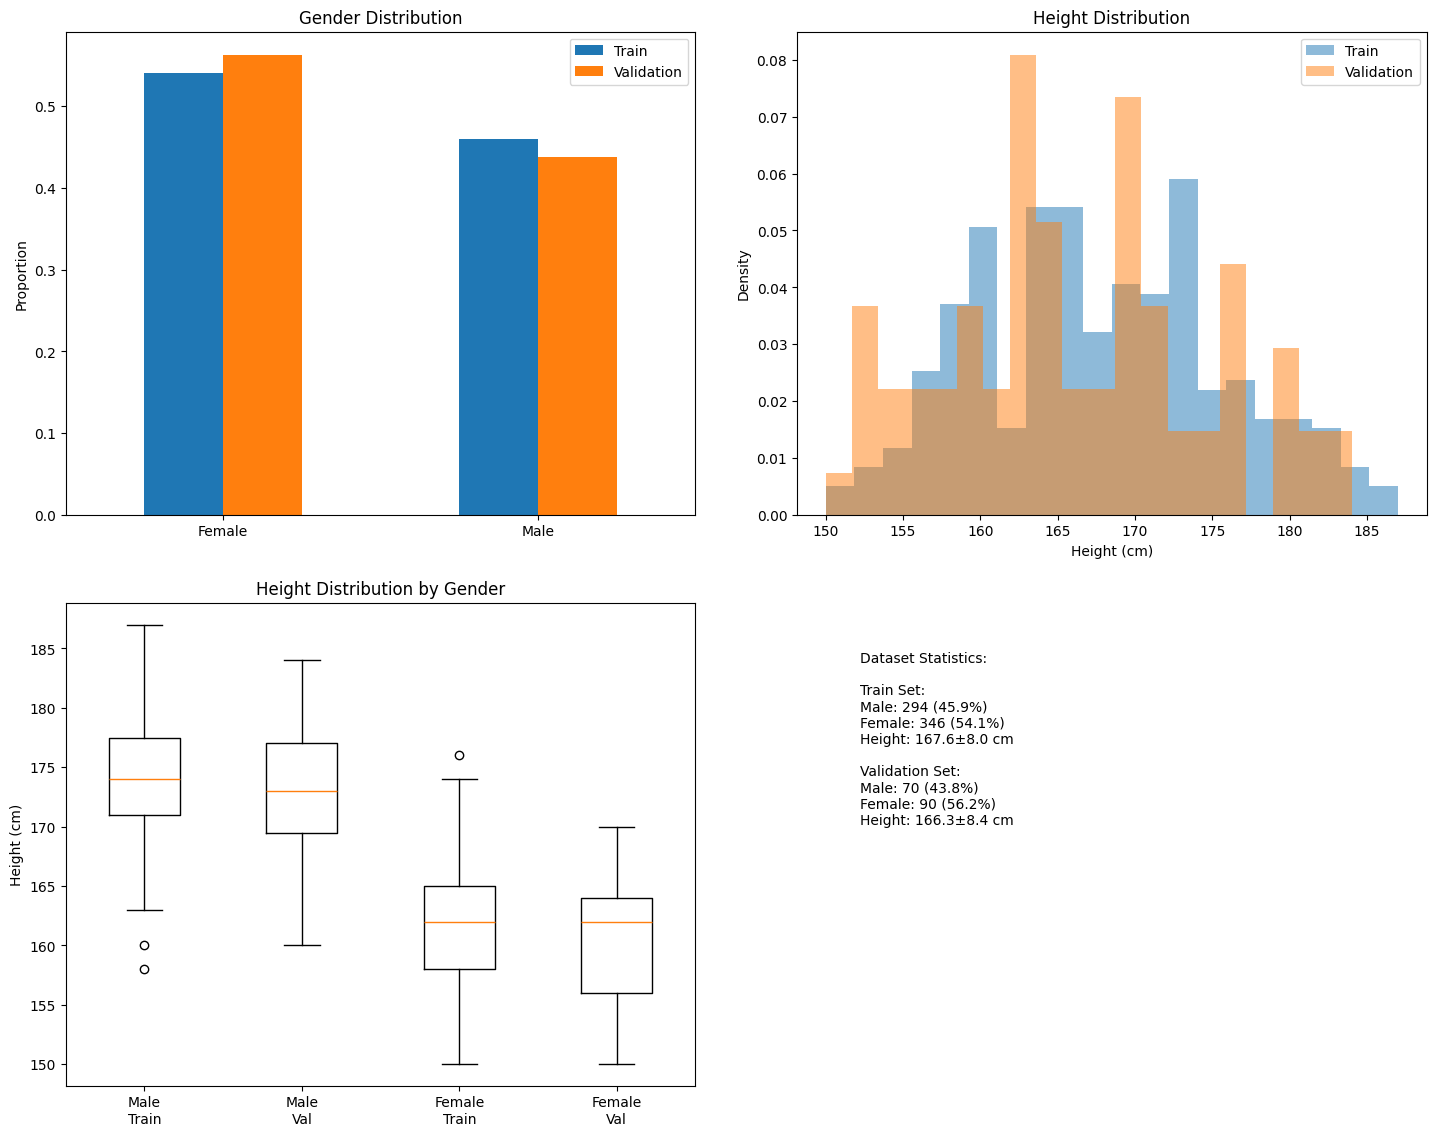

In [16]:
import torch
import random
import numpy as np

def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)   

def stratified_group_split(dataset_path):
    """키와 성별을 고려한 층화 GroupKFold 분할"""
    # 경로 설정
    image_root = os.path.join(dataset_path, 'train', 'DCM')
    label_root = os.path.join(dataset_path, 'train', 'outputs_json')
    
    # 메타데이터 로드 및 전처리
    meta_df = pd.read_excel(os.path.join(dataset_path, 'meta_data.xlsx'))
    meta_df = meta_df.drop('Unnamed: 5', axis=1)
    meta_df['ID'] = meta_df.index.map(lambda x: f"ID{str(x+1).zfill(3)}")
    
    # 성별 데이터 표준화
    meta_df['Gender'] = meta_df['성별'].apply(lambda x: 'Female' if '여' in str(x) else 'Male')
    meta_df = meta_df.rename(columns={'키(신장)': 'Height'})
    
    # 키 구간 나누기 (4분위)
    meta_df['Height_Quartile'] = pd.qcut(meta_df['Height'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    
    # 성별-키 조합으로 층화 그룹 생성
    meta_df['Strata'] = meta_df['Gender'] + '_' + meta_df['Height_Quartile'].astype(str)
    
    # 이미지 파일 정보 수집
    pngs = sorted([
        os.path.relpath(os.path.join(root, fname), start=image_root)
        for root, _dirs, files in os.walk(image_root)
        for fname in files
        if os.path.splitext(fname)[1].lower() == ".png"
    ])
    
    # 각 이미지의 ID와 strata 매핑
    image_strata = []
    groups = []
    for fname in pngs:
        id_folder = os.path.dirname(fname).split('/')[-1]
        strata = meta_df[meta_df['ID'] == id_folder]['Strata'].iloc[0]
        image_strata.append(strata)
        groups.append(id_folder)
    
    # 층화된 GroupKFold 실행
    gkf = GroupKFold(n_splits=5)
    
    # 각 층의 분포를 추적
    best_split = None
    best_score = float('inf')
    
    for train_idx, val_idx in gkf.split(pngs, groups=groups):
        # 각 분할에서의 strata 분포 계산
        train_strata = [image_strata[i] for i in train_idx]
        val_strata = [image_strata[i] for i in val_idx]
        
        train_dist = pd.Series(train_strata).value_counts(normalize=True)
        val_dist = pd.Series(val_strata).value_counts(normalize=True)
        
        # 분포 차이 계산 (KL divergence 사용)
        score = 0
        for strata in set(image_strata):
            train_prop = train_dist.get(strata, 0)
            val_prop = val_dist.get(strata, 0)
            # 차이의 제곱 사용
            score += (train_prop - val_prop) ** 2
        
        if score < best_score:
            best_score = score
            best_split = (train_idx, val_idx)
    
    # 최적의 분할 결과 분석
    train_idx, val_idx = best_split
    
    # 분할 결과 통계
    print("\nStratified Split Statistics:")
    train_strata = [image_strata[i] for i in train_idx]
    val_strata = [image_strata[i] for i in val_idx]
    
    print("\nTraining set distribution:")
    train_dist = pd.Series(train_strata).value_counts(normalize=True)
    print(train_dist)
    
    print("\nValidation set distribution:")
    val_dist = pd.Series(val_strata).value_counts(normalize=True)
    print(val_dist)
    
    # ID 기반 통계
    train_ids = sorted(set([os.path.dirname(pngs[i]).split('/')[-1] for i in train_idx]))
    val_ids = sorted(set([os.path.dirname(pngs[i]).split('/')[-1] for i in val_idx]))
    
    print(f"\nNumber of training IDs: {len(train_ids)}")
    print(f"Number of validation IDs: {len(val_ids)}")
    
    # Matplotlib 설정
    plt.rcParams['figure.figsize'] = (15, 12)
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['font.size'] = 10
    
    # 분석 및 시각화
    fig = plt.figure(figsize=(15, 12))
    
    # 1. 성별 분포 (좌상단)
    ax1 = plt.subplot(2, 2, 1)
    train_gender = pd.Series([s.split('_')[0] for s in train_strata]).value_counts(normalize=True)
    val_gender = pd.Series([s.split('_')[0] for s in val_strata]).value_counts(normalize=True)
    
    gender_df = pd.DataFrame({
        'Train': train_gender,
        'Validation': val_gender
    })
    gender_df.plot(kind='bar', ax=ax1)
    ax1.set_title('Gender Distribution')
    ax1.set_ylabel('Proportion')
    ax1.tick_params(axis='x', rotation=0)
    
    # 2. 키 분포 히스토그램 (우상단)
    ax2 = plt.subplot(2, 2, 2)
    train_heights = meta_df[meta_df['ID'].isin(train_ids)]['Height']
    val_heights = meta_df[meta_df['ID'].isin(val_ids)]['Height']
    
    ax2.hist(train_heights, bins=20, alpha=0.5, label='Train', density=True)
    ax2.hist(val_heights, bins=20, alpha=0.5, label='Validation', density=True)
    ax2.set_title('Height Distribution')
    ax2.set_xlabel('Height (cm)')
    ax2.set_ylabel('Density')
    ax2.legend()
    
    # 3. 성별별 키 분포 박스플롯 (좌하단)
    ax3 = plt.subplot(2, 2, 3)
    train_data = meta_df[meta_df['ID'].isin(train_ids)]
    val_data = meta_df[meta_df['ID'].isin(val_ids)]
    
    box_data = []
    labels = []
    for gender in ['Male', 'Female']:
        box_data.append(train_data[train_data['Gender'] == gender]['Height'])
        box_data.append(val_data[val_data['Gender'] == gender]['Height'])
        labels.extend([f'{gender}\nTrain', f'{gender}\nVal'])
    
    ax3.boxplot(box_data, labels=labels)
    ax3.set_title('Height Distribution by Gender')
    ax3.set_ylabel('Height (cm)')
    
    # 4. 통계 텍스트 (우하단)
    ax4 = plt.subplot(2, 2, 4)
    ax4.axis('off')
    
    stats_text = "Dataset Statistics:\n\n"
    
    # Train set 통계
    stats_text += "Train Set:\n"
    train_gender_counts = pd.Series([s.split('_')[0] for s in train_strata]).value_counts()
    stats_text += f"Male: {train_gender_counts.get('Male', 0)} ({train_gender_counts.get('Male', 0)/len(train_strata):.1%})\n"
    stats_text += f"Female: {train_gender_counts.get('Female', 0)} ({train_gender_counts.get('Female', 0)/len(train_strata):.1%})\n"
    stats_text += f"Height: {train_heights.mean():.1f}±{train_heights.std():.1f} cm\n\n"
    
    # Validation set 통계
    stats_text += "Validation Set:\n"
    val_gender_counts = pd.Series([s.split('_')[0] for s in val_strata]).value_counts()
    stats_text += f"Male: {val_gender_counts.get('Male', 0)} ({val_gender_counts.get('Male', 0)/len(val_strata):.1%})\n"
    stats_text += f"Female: {val_gender_counts.get('Female', 0)} ({val_gender_counts.get('Female', 0)/len(val_strata):.1%})\n"
    stats_text += f"Height: {val_heights.mean():.1f}±{val_heights.std():.1f} cm"
    
    ax4.text(0.1, 0.9, stats_text, fontsize=10, va='top')
    
    plt.tight_layout(pad=3.0)
    plt.show()
    
    return train_ids, val_ids

# 실행
train_ids, val_ids = stratified_group_split(dataset_path)

In [17]:
def analyze_folds(dataset_path):
    """각 fold의 분포를 분석하고 가장 좋은 fold 찾기"""
    # 기존 데이터 로딩 코드 재사용
    image_root = os.path.join(dataset_path, 'train', 'DCM')
    label_root = os.path.join(dataset_path, 'train', 'outputs_json')
    
    meta_df = pd.read_excel(os.path.join(dataset_path, 'meta_data.xlsx'))
    meta_df = meta_df.drop('Unnamed: 5', axis=1)
    meta_df['ID'] = meta_df.index.map(lambda x: f"ID{str(x+1).zfill(3)}")
    meta_df['Gender'] = meta_df['성별'].apply(lambda x: 'Female' if '여' in str(x) else 'Male')
    meta_df = meta_df.rename(columns={'키(신장)': 'Height'})
    meta_df['Height_Quartile'] = pd.qcut(meta_df['Height'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    meta_df['Strata'] = meta_df['Gender'] + '_' + meta_df['Height_Quartile'].astype(str)
    
    pngs = sorted([
        os.path.relpath(os.path.join(root, fname), start=image_root)
        for root, _dirs, files in os.walk(image_root)
        for fname in files
        if os.path.splitext(fname)[1].lower() == ".png"
    ])
    
    # 각 이미지의 strata와 group 정보 수집
    image_strata = []
    groups = []
    for fname in pngs:
        id_folder = os.path.dirname(fname).split('/')[-1]
        strata = meta_df[meta_df['ID'] == id_folder]['Strata'].iloc[0]
        image_strata.append(strata)
        groups.append(id_folder)
    
    # 각 fold의 결과를 저장
    fold_info = []
    gkf = GroupKFold(n_splits=5)
    
    # 각 fold별 분석
    for fold_idx, (train_idx, val_idx) in enumerate(gkf.split(pngs, groups=groups)):
        train_strata = [image_strata[i] for i in train_idx]
        val_strata = [image_strata[i] for i in val_idx]
        
        train_dist = pd.Series(train_strata).value_counts(normalize=True)
        val_dist = pd.Series(val_strata).value_counts(normalize=True)
        
        # 분포 차이 계산
        score = 0
        for strata in set(image_strata):
            train_prop = train_dist.get(strata, 0)
            val_prop = val_dist.get(strata, 0)
            score += (train_prop - val_prop) ** 2
        
        # ID와 통계 정보 수집
        train_ids = sorted(set([os.path.dirname(pngs[i]).split('/')[-1] for i in train_idx]))
        val_ids = sorted(set([os.path.dirname(pngs[i]).split('/')[-1] for i in val_idx]))
        
        fold_info.append({
            'fold_idx': fold_idx,
            'score': score,
            'train_ids': len(train_ids),
            'val_ids': len(val_ids),
            'train_dist': train_dist,
            'val_dist': val_dist
        })
    
    # 점수로 정렬
    fold_info.sort(key=lambda x: x['score'])
    
    # 결과 출력
    print("\nFold Analysis Results:")
    print("=" * 50)
    for fold in fold_info:
        print(f"\nFold {fold['fold_idx']} (Score: {fold['score']:.6f})")
        print(f"Train/Val Split: {fold['train_ids']}/{fold['val_ids']} IDs")
        print("\nDistribution Difference:")
        for strata in fold['train_dist'].index:
            train_prop = fold['train_dist'].get(strata, 0)
            val_prop = fold['val_dist'].get(strata, 0)
            diff = abs(train_prop - val_prop)
            print(f"{strata}: {diff:.3f}")
        print("-" * 50)
    
    best_fold = fold_info[0]
    print(f"\nBest fold is {best_fold['fold_idx']} with score {best_fold['score']:.6f}")
    
    return best_fold['fold_idx']

# 실행
best_fold_idx = analyze_folds(dataset_path)


Fold Analysis Results:

Fold 4 (Score: 0.003848)
Train/Val Split: 320/80 IDs

Distribution Difference:
Female_Q1: 0.013
Female_Q2: 0.006
Male_Q3: 0.050
Male_Q4: 0.009
Female_Q3: 0.019
Male_Q2: 0.019
Male_Q1: 0.019
Female_Q4: 0.003
--------------------------------------------------

Fold 3 (Score: 0.007266)
Train/Val Split: 320/80 IDs

Distribution Difference:
Female_Q2: 0.022
Female_Q1: 0.044
Male_Q4: 0.009
Male_Q3: 0.044
Male_Q2: 0.044
Female_Q3: 0.028
Male_Q1: 0.003
--------------------------------------------------

Fold 1 (Score: 0.008633)
Train/Val Split: 320/80 IDs

Distribution Difference:
Female_Q1: 0.003
Female_Q2: 0.009
Male_Q3: 0.050
Male_Q4: 0.069
Female_Q3: 0.028
Male_Q2: 0.019
Male_Q1: 0.013
Female_Q4: 0.003
--------------------------------------------------

Fold 2 (Score: 0.011953)
Train/Val Split: 320/80 IDs

Distribution Difference:
Female_Q2: 0.053
Female_Q1: 0.044
Male_Q4: 0.056
Male_Q3: 0.059
Male_Q2: 0.003
Female_Q3: 0.019
Male_Q1: 0.013
Female_Q4: 0.003
--------

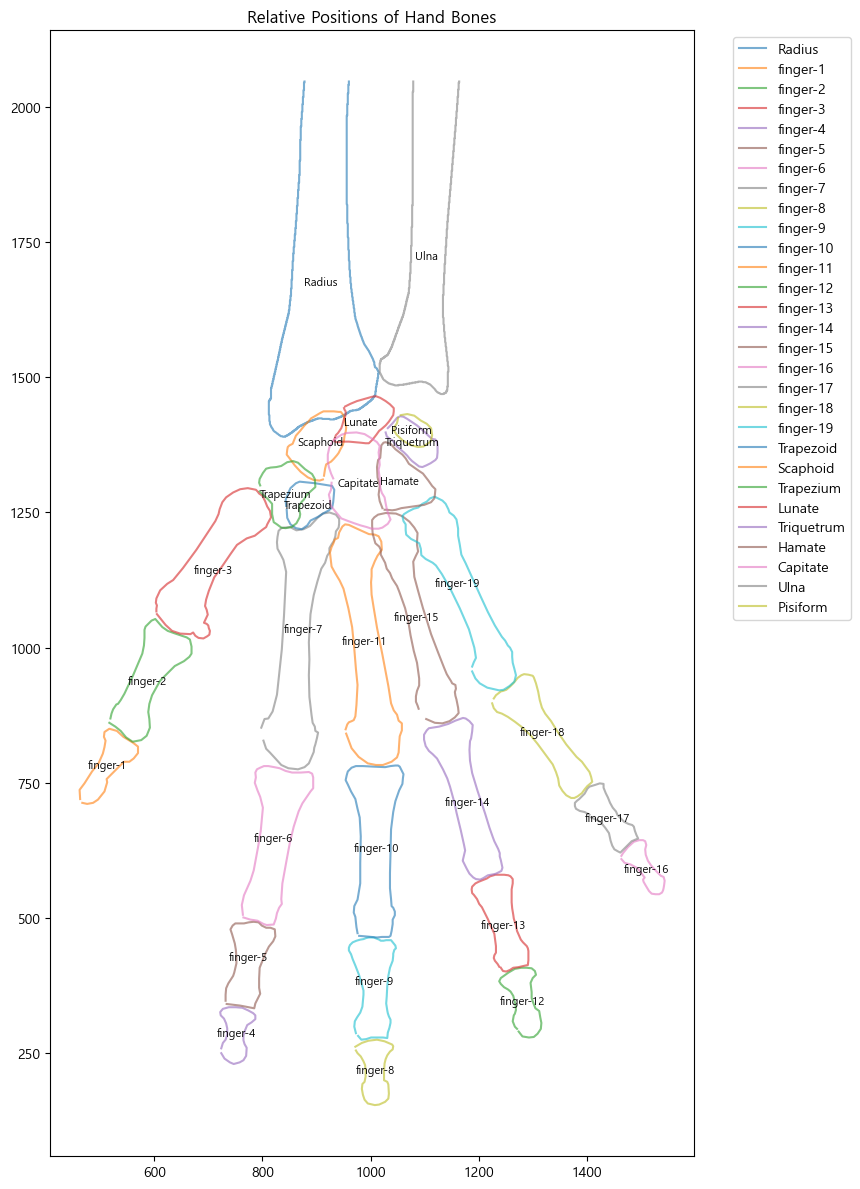

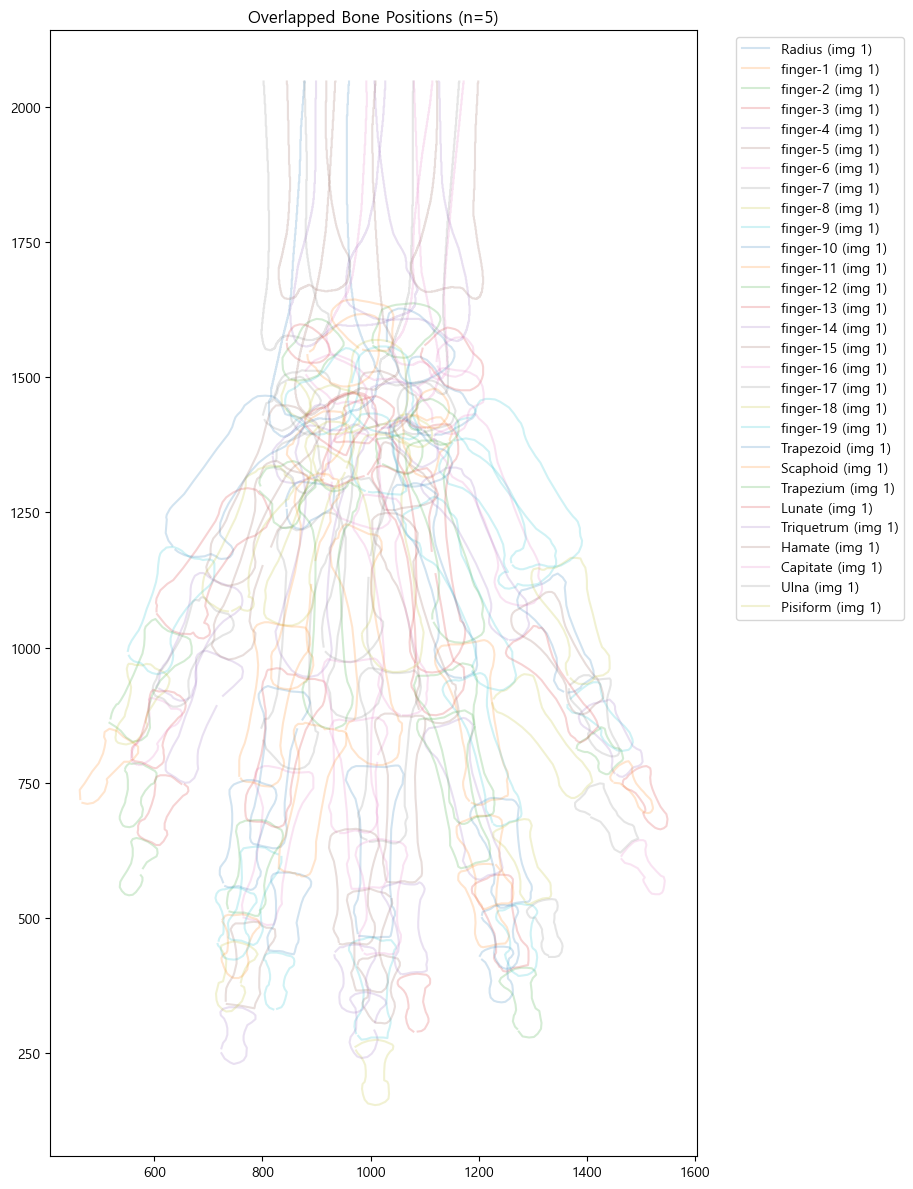

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

def load_json_files(base_path, num_samples=5):
    json_files = []
    train_path = os.path.join(base_path, 'train', 'outputs_json')
    
    # ID 폴더들을 순회
    for id_folder in os.listdir(train_path):
        if id_folder.startswith('ID'):
            id_path = os.path.join(train_path, id_folder)
            
            # 각 ID 폴더 안의 JSON 파일들을 찾음
            for json_file in os.listdir(id_path):
                if json_file.endswith('.json'):
                    json_files.append(os.path.join(id_path, json_file))
                    if len(json_files) >= num_samples:
                        return json_files
    return json_files

def plot_bone_positions(json_data):
    plt.figure(figsize=(12, 12))
    
    for anno in json_data['annotations']:
        points = np.array(anno['points'])
        
        # 뼈의 중심점 계산
        center_x = np.mean(points[:, 0])
        center_y = np.mean(points[:, 1])
        
        # 폴리곤 그리기
        plt.plot(points[:, 0], points[:, 1], '-', label=anno['label'], alpha=0.6)
        
        # 중심점에 레이블 표시
        plt.text(center_x, center_y, anno['label'], 
                horizontalalignment='center', 
                verticalalignment='center',
                fontsize=8)
    
    plt.title('Relative Positions of Hand Bones')
    plt.gca().set_aspect('equal')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_multiple_bone_positions(json_files):
    plt.figure(figsize=(12, 12))
    
    for i, json_file in enumerate(json_files):
        with open(json_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
            
        # 각 이미지별로 다른 투명도 사용
        alpha = 1.0 / len(json_files)
        
        for anno in data['annotations']:
            points = np.array(anno['points'])
            plt.plot(points[:, 0], points[:, 1], '-', alpha=alpha, 
                    label=f"{anno['label']} (img {i+1})" if i == 0 else "")
    
    plt.title(f'Overlapped Bone Positions (n={len(json_files)})')
    plt.gca().set_aspect('equal')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 실행 예시
base_path = '../data'  # 실제 데이터 경로로 수정하세요
json_files = load_json_files(base_path, num_samples=5)

# 첫 번째 파일에 대한 단일 시각화
with open(json_files[0], 'r', encoding='utf-8') as f:
    first_data = json.load(f)
plot_bone_positions(first_data)

# 여러 이미지 중첩 시각화
plot_multiple_bone_positions(json_files)

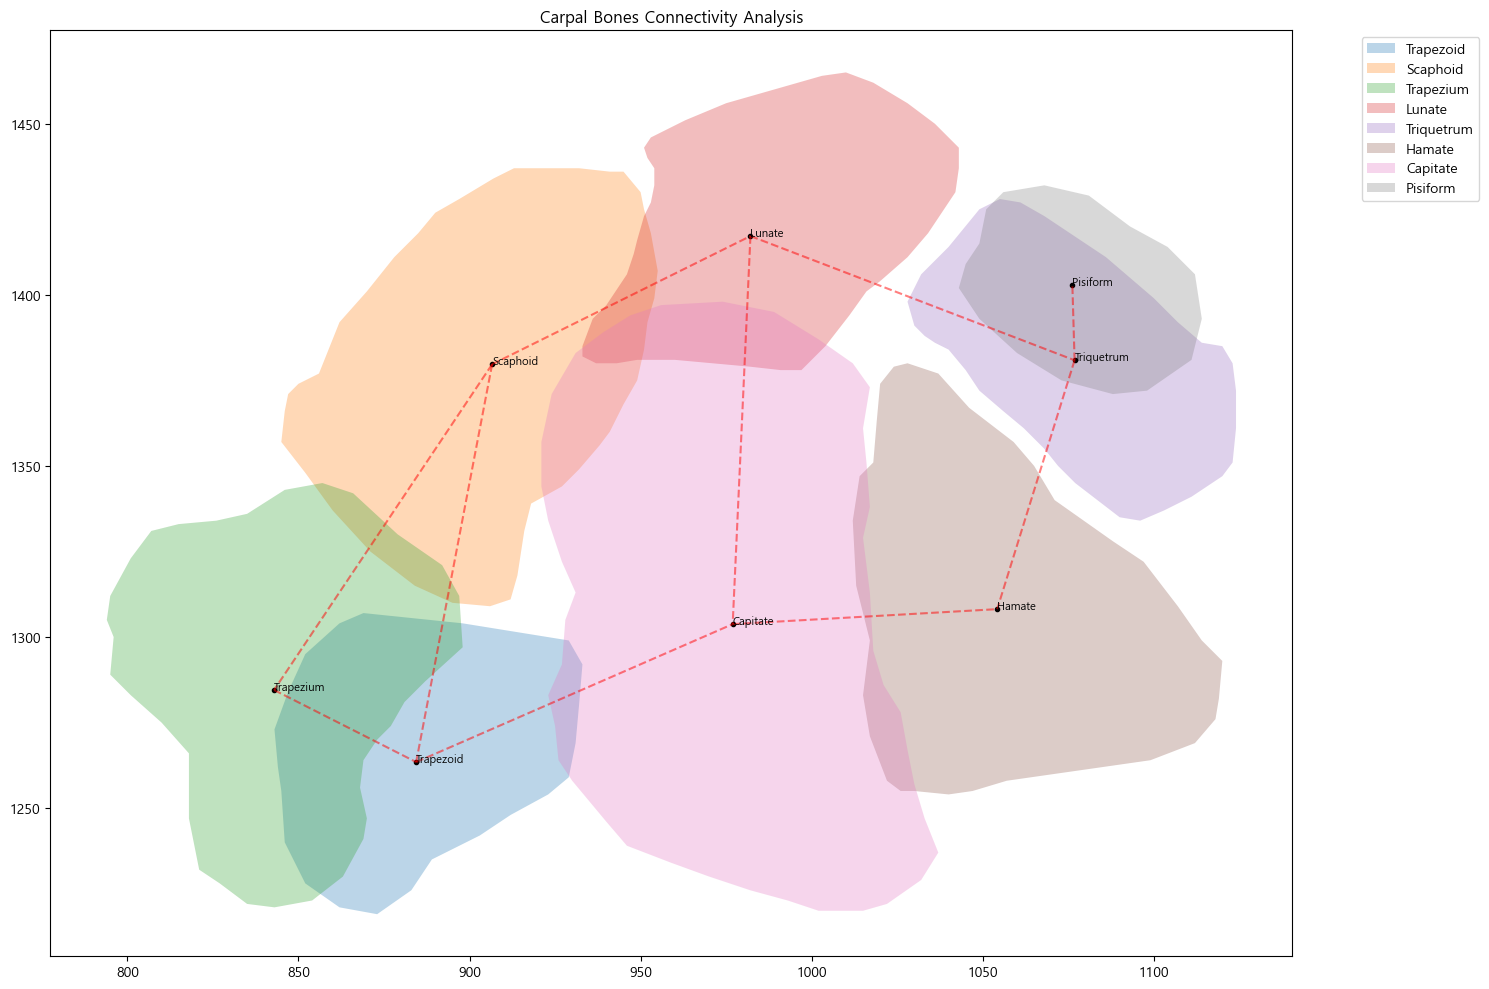

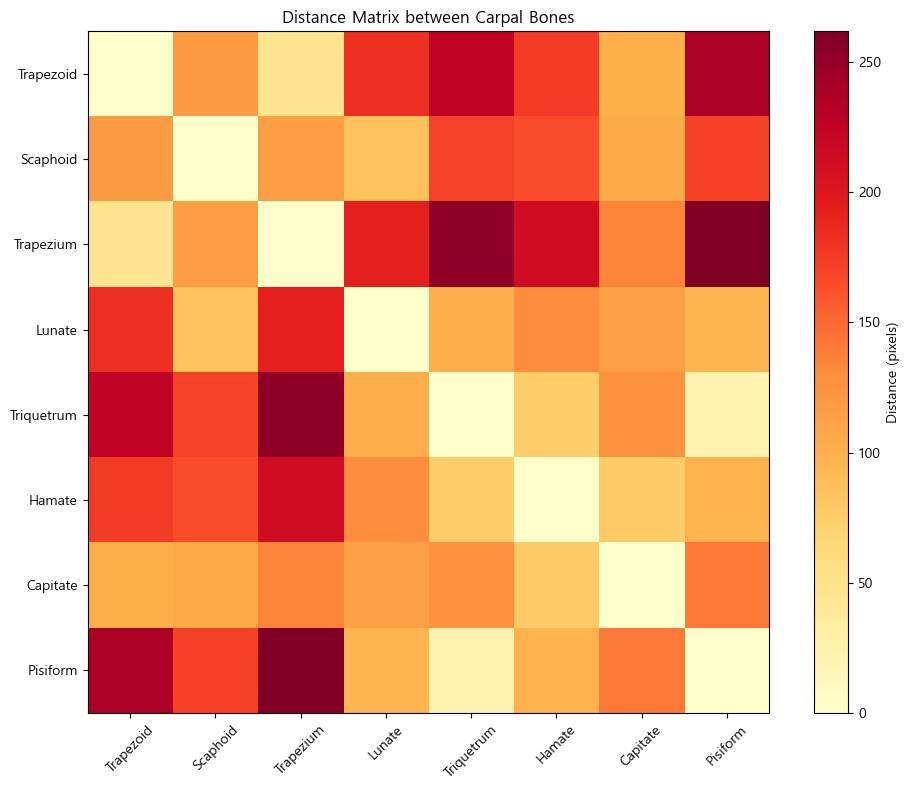

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

def analyze_carpal_bones_connectivity(json_data):
    # 수근골(손등) 뼈 목록
    carpal_bones = [
        'Scaphoid', 'Lunate', 'Triquetrum', 'Pisiform',
        'Trapezium', 'Trapezoid', 'Capitate', 'Hamate'
    ]
    
    plt.figure(figsize=(15, 10))
    
    # 각 뼈의 중심점과 경계를 저장할 딕셔너리
    bone_centers = {}
    bone_boundaries = {}
    
    # 각 뼈의 중심점과 경계 계산
    for anno in json_data['annotations']:
        if anno['label'] in carpal_bones:
            points = np.array(anno['points'])
            center = np.mean(points, axis=0)
            bone_centers[anno['label']] = center
            bone_boundaries[anno['label']] = points
    
    # 뼈들 그리기
    for label, points in bone_boundaries.items():
        plt.fill(points[:, 0], points[:, 1], alpha=0.3, label=label)
        
        # 중심점 표시
        center = bone_centers[label]
        plt.plot(center[0], center[1], 'k.')
        plt.text(center[0], center[1], label, fontsize=8)
    
    # 인접한 뼈들 사이의 연결선 그리기
    # 해부학적 연결관계 정의
    connections = [
    # 근위열 연결
        ('Scaphoid', 'Lunate'),
        ('Lunate', 'Triquetrum'),
        ('Triquetrum', 'Pisiform'),
        
        # 원위열 연결
        ('Trapezium', 'Trapezoid'),
        ('Trapezoid', 'Capitate'),
        ('Capitate', 'Hamate'),
        
        # 근위-원위열 간 연결
        ('Scaphoid', 'Trapezium'),
        ('Scaphoid', 'Trapezoid'),
        ('Lunate', 'Capitate'),
        ('Triquetrum', 'Hamate'),
    ]
    
    # 연결선 그리기
    for bone1, bone2 in connections:
        if bone1 in bone_centers and bone2 in bone_centers:
            center1 = bone_centers[bone1]
            center2 = bone_centers[bone2]
            plt.plot([center1[0], center2[0]], 
                    [center1[1], center2[1]], 
                    'r--', alpha=0.5)
    
    # 거리 매트릭스 계산 및 출력
    bone_names = list(bone_centers.keys())
    distances = np.zeros((len(bone_names), len(bone_names)))
    
    for i, bone1 in enumerate(bone_names):
        for j, bone2 in enumerate(bone_names):
            if i != j:
                dist = np.linalg.norm(bone_centers[bone1] - bone_centers[bone2])
                distances[i, j] = dist
    
    plt.title('Carpal Bones Connectivity Analysis')
    plt.gca().set_aspect('equal')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # 거리 매트릭스 시각화
    plt.figure(figsize=(10, 8))
    plt.imshow(distances, cmap='YlOrRd')
    plt.colorbar(label='Distance (pixels)')
    plt.xticks(range(len(bone_names)), bone_names, rotation=45)
    plt.yticks(range(len(bone_names)), bone_names)
    plt.title('Distance Matrix between Carpal Bones')
    plt.tight_layout()
    
    plt.show()
    
    return distances, bone_centers

# 실행
def load_and_analyze_sample(base_path):
    train_path = os.path.join(base_path, 'train', 'outputs_json')
    
    # 첫 번째 ID 폴더의 첫 번째 JSON 파일 로드
    for id_folder in os.listdir(train_path):
        if id_folder.startswith('ID'):
            id_path = os.path.join(train_path, id_folder)
            for json_file in os.listdir(id_path):
                if json_file.endswith('.json'):
                    with open(os.path.join(id_path, json_file), 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        distances, centers = analyze_carpal_bones_connectivity(data)
                        return distances, centers

# 실행
base_path = '../data'  # 실제 경로로 수정하세요
distances, centers = load_and_analyze_sample(base_path)

C:\Users\cj968\AppData\Local\Temp\ipykernel_64776\2719302581.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(x_data, labels=bone_coordinates.keys())
C:\Users\cj968\AppData\Local\Temp\ipykernel_64776\2719302581.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(y_data, labels=bone_coordinates.keys())


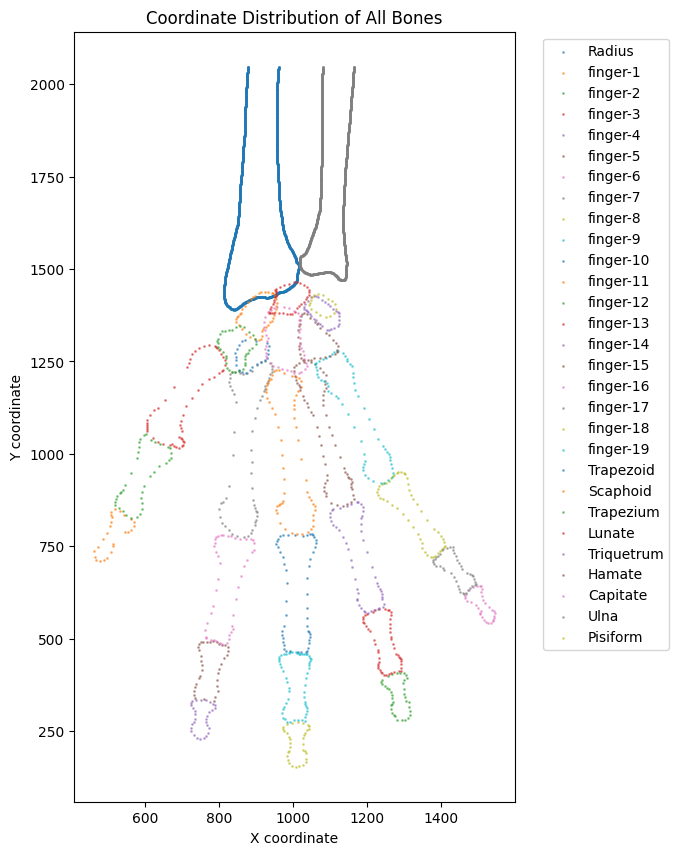

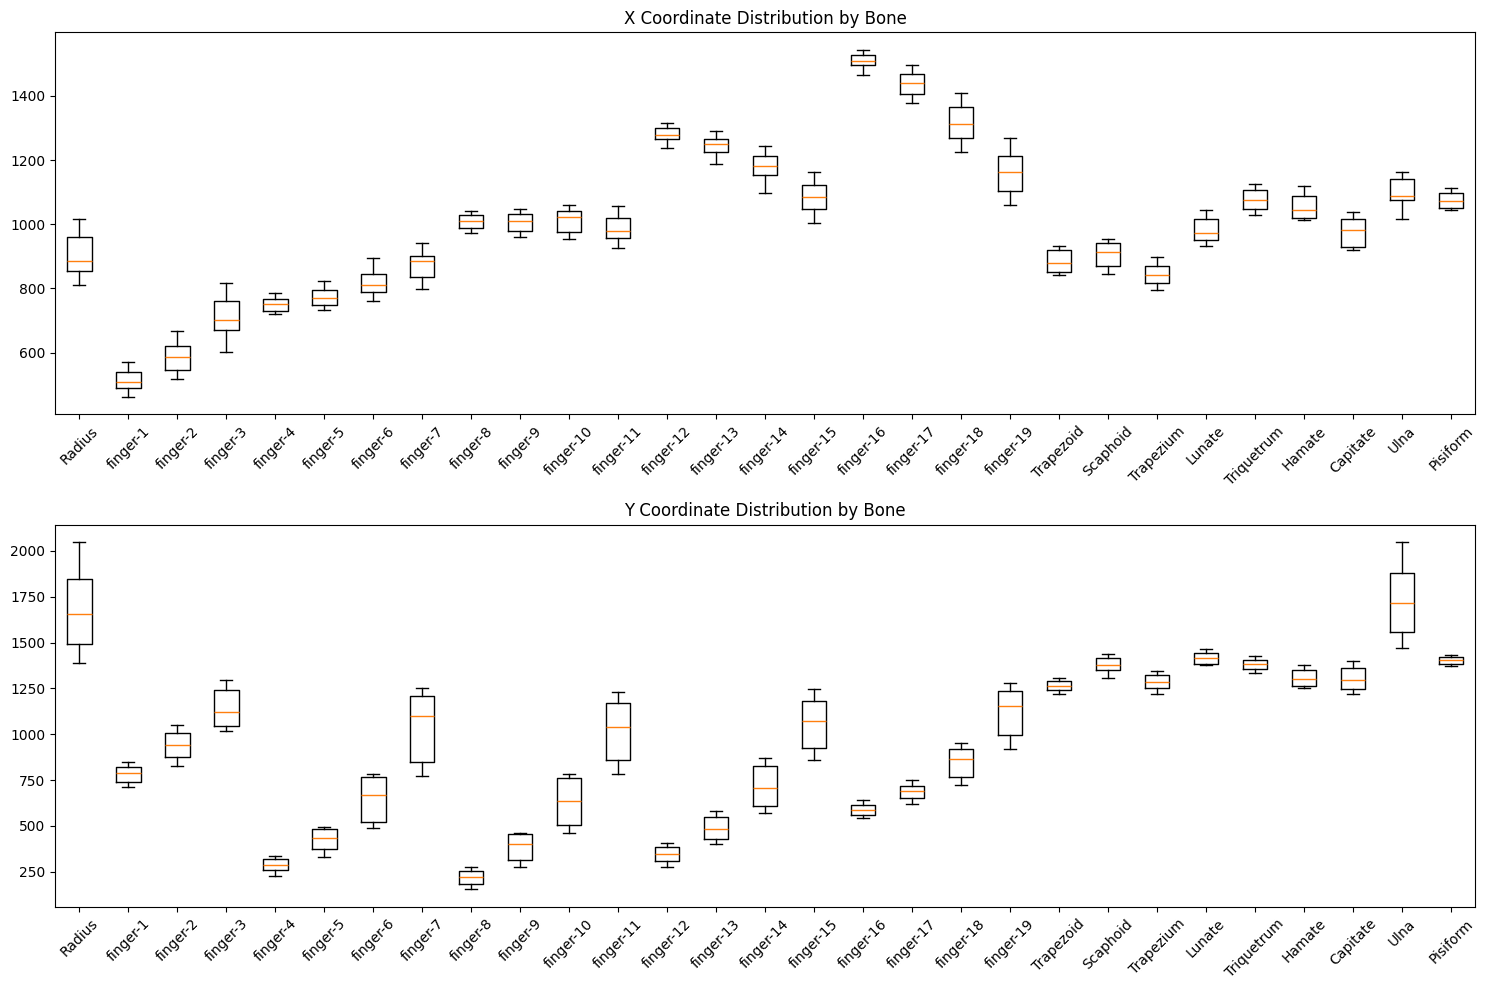

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from collections import defaultdict

def analyze_coordinate_distribution(json_data):
    # 각 뼈별 좌표를 저장할 딕셔너리
    bone_coordinates = defaultdict(lambda: {'x': [], 'y': []})
    
    # 데이터 수집
    for anno in json_data['annotations']:
        label = anno['label']
        points = np.array(anno['points'])
        bone_coordinates[label]['x'].extend(points[:, 0])
        bone_coordinates[label]['y'].extend(points[:, 1])
    
    # 시각화
    plt.figure(figsize=(20, 10))
    
    # 1. 산점도 (Scatter plot)
    plt.subplot(121)
    for label, coords in bone_coordinates.items():
        plt.scatter(coords['x'], coords['y'], alpha=0.5, label=label, s=1)
    
    plt.title('Coordinate Distribution of All Bones')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gca().set_aspect('equal')
    
    # 2. 박스플롯 (Box plot)
    plt.figure(figsize=(15, 10))
    
    # X 좌표 박스플롯
    plt.subplot(211)
    x_data = [coords['x'] for coords in bone_coordinates.values()]
    plt.boxplot(x_data, labels=bone_coordinates.keys())
    plt.title('X Coordinate Distribution by Bone')
    plt.xticks(rotation=45)
    
    # Y 좌표 박스플롯
    plt.subplot(212)
    y_data = [coords['y'] for coords in bone_coordinates.values()]
    plt.boxplot(y_data, labels=bone_coordinates.keys())
    plt.title('Y Coordinate Distribution by Bone')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    # # 3. 히트맵 (2D histogram)
    # plt.figure(figsize=(12, 10))
    # for label, coords in bone_coordinates.items():
    #     plt.figure(figsize=(8, 8))
    #     plt.hist2d(coords['x'], coords['y'], bins=50, cmap='viridis')
    #     plt.colorbar(label='Point density')
    #     plt.title(f'Point Density Distribution - {label}')
    #     plt.xlabel('X coordinate')
    #     plt.ylabel('Y coordinate')
    #     plt.gca().set_aspect('equal')
    
    # plt.show()

def analyze_multiple_images(base_path, num_samples=5):
    train_path = os.path.join(base_path, 'train', 'outputs_json')
    all_coordinates = defaultdict(lambda: {'x': [], 'y': []})
    
    count = 0
    for id_folder in os.listdir(train_path):
        if id_folder.startswith('ID'):
            id_path = os.path.join(train_path, id_folder)
            for json_file in os.listdir(id_path):
                if json_file.endswith('.json'):
                    with open(os.path.join(id_path, json_file), 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        analyze_coordinate_distribution(data)
                        count += 1
                        if count >= num_samples:
                            return
                            
# 실행
base_path = '../data'  # 실제 경로로 수정하세요
analyze_multiple_images(base_path, num_samples=1)

In [7]:
import numpy as np

def find_radius_outliers(base_path, threshold=0.01):  # threshold는 조정 가능
    json_path = os.path.join(base_path, 'train', 'outputs_json')
    outliers = []
    
    for id_num in range(1, 551):
        id_folder = f'ID{str(id_num).zfill(3)}'
        current_json_path = os.path.join(json_path, id_folder)
        
        if os.path.exists(current_json_path):
            for json_file in os.listdir(current_json_path):
                if json_file.endswith('.json'):
                    file_path = os.path.join(current_json_path, json_file)
                    with open(file_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        img_size = (2048, 2048)
                        
                        for anno in data['annotations']:
                            if anno['label'] == 'Radius':
                                points = np.array(anno['points'])
                                area = calculate_polygon_area(points[:, 0], points[:, 1])
                                area_ratio = area / (img_size[0] * img_size[1])
                                
                                if area_ratio < threshold:
                                    outliers.append({
                                        'id': id_folder,
                                        'file': json_file,
                                        'area_ratio': area_ratio,
                                        'path': file_path
                                    })
    
    return outliers

# 실행
outliers = find_radius_outliers('../data')
print("\nRadius outliers found:")
for outlier in outliers:
    print(f"ID: {outlier['id']}, File: {outlier['file']}")
    print(f"Area ratio: {outlier['area_ratio']:.6f}")
    print(f"Path: {outlier['path']}\n")


Radius outliers found:
